In [1]:
from matplotlib import cm
import torch
import gpytorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



def data_import(path, delimiter):
    # Read the data, treating empty strings as NaN
    if delimiter == 'none':
        data = pd.read_csv(path, na_values=["", " ", "nan", "NaN", "NA"])
    else:
        data = pd.read_csv(path, delimiter=delimiter, na_values=["", " ", "nan", "NaN", "NA"])
    
    # Drop rows with any NaN values
    data.dropna(axis=0, how='any', inplace=True)
    return data



def data_frequency(file1, desired_frequency: str):
    # Ensure 'Time(UTC)' is in datetime format
    file1['Time(UTC)'] = pd.to_datetime(file1['Time(UTC)'])

    # Set 'Time(UTC)' as the index
    file1.set_index('Time(UTC)', inplace=True)

    if desired_frequency == 'ten_minute':
        file1 = file1.resample('10T').mean()
    elif desired_frequency == '4_hourly':
        file1 = file1.resample('4H').mean()
    elif desired_frequency == 'hourly':
        file1 = file1.resample('H').mean()
    elif desired_frequency == 'twelve_hourly':
        file1 = file1.resample('12H').mean()
    elif desired_frequency == 'daily':
        file1 = file1.resample('D').mean()

    # Drop any rows with NaN values after resampling
    # Drop rows with any NaN values
    file1.dropna(axis=0, how='any', inplace=True)    
    # Reset the index and name it 'Time(UTC)'
    file1.reset_index(inplace=True)
    file1.rename(columns={file1.index.name: 'Time(UTC)'}, inplace=True)

    return file1

def time_to_sincos(df):
    sin_values = []
    cos_values = []

    for i in range(len(df)):
        sin_values.append(np.sin((2 * np.pi * i) / 365.25))
        cos_values.append(np.cos((2 * np.pi * i) / 365.25))
        
    df['Time_sin'] = sin_values
    df['Time_cos'] = cos_values
    
    return df


#importing s2 and m1 data sets
s2_site_data= data_import("C:\\Users\\396760\\lanl\\data\\ARMSAILS2_cleaned.csv", 'none')
m1_site_data = data_import("C:\\Users\\396760\\lanl\\data\\ARMSAILM1_cleaned.csv", 'none')

#change to 12 hour frequency 
s2_site_data = data_frequency(s2_site_data, 'hourly')
m1_site_data = data_frequency(m1_site_data, 'hourly') 

#extract time(UTC) collumns for usage later
time_s2 = s2_site_data['Time(UTC)']
time_m1 = m1_site_data['Time(UTC)']

#remove pressure data from sets
""" s2_site_data.drop(columns=['sample_pres_mmHg'], inplace=True)
m1_site_data.drop(columns=['sample_pres_mmHg'], inplace=True) """


#add sin and cos time values to data
s2_site_data = time_to_sincos(s2_site_data)
m1_site_data = time_to_sincos(m1_site_data)


#change entire dataset to tensor
collumns = ['Time_sin', 'sample_rh_pct', 'sample_temp_C', 'pm_1_ug_per_m3']

s2_site_data = torch.tensor(s2_site_data[collumns].values, dtype=torch.float32)
m1_site_data = torch.tensor(m1_site_data[collumns].values, dtype=torch.float32)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\396760\\lanl\\data\\ARMSAILS2_cleaned.csv'

In [ ]:
def count_points_in_month(time_series, month, year):
    # Convert the time series to datetime format
    time_series = pd.to_datetime(time_series)
    
    # Filter the series for the given month and year
    mask = (time_series.dt.month == month) & (time_series.dt.year == year)
    filtered_series = time_series[mask]
    
    # Count the number of data points in the filtered series
    count = filtered_series.shape[0]
    
    return count

# Example usage
# Count the number of data points for each month in s2 data
points_in_june_2022 = count_points_in_month(time_s2, 6, 2022)
print(f'Number of data points in June 2022: {points_in_june_2022}')

points_in_july_2022 = count_points_in_month(time_s2, 7, 2022)
print(f'Number of data points in July 2022: {points_in_july_2022}')

points_in_august_2022 = count_points_in_month(time_s2, 8, 2022)
print(f'Number of data points in August 2022: {points_in_august_2022}')

points_in_september_2022 = count_points_in_month(time_s2, 9, 2022)
print(f'Number of data points in September 2022: {points_in_september_2022}')

points_in_october_2022 = count_points_in_month(time_s2, 10, 2022)
print(f'Number of data points in October 2022: {points_in_october_2022}')

points_in_november_2022 = count_points_in_month(time_s2, 11, 2022)
print(f'Number of data points in November 2022: {points_in_november_2022}')

# Count the number of data points in December 2022
points_in_december_2022 = count_points_in_month(time_s2, 12, 2022)
print(f'Number of data points in December 2022: {points_in_december_2022}')

# Count the number of data points in January 2023
points_in_january_2023 = count_points_in_month(time_s2, 1, 2023)
print(f'Number of data points in January 2023: {points_in_january_2023}')

# Count the number of data points in February 2023
points_in_february_2023 = count_points_in_month(time_s2, 2, 2023)
print(f'Number of data points in February 2023: {points_in_february_2023}')

# Count the number of data points in March 2023
points_in_march_2023 = count_points_in_month(time_s2, 3, 2023)
print(f'Number of data points in March 2023: {points_in_march_2023}')

# Count the number of data points in April 2023
points_in_april_2023 = count_points_in_month(time_s2, 4, 2023)
print(f'Number of data points in April 2023: {points_in_april_2023}')

# Count the number of data points in May 2023
points_in_may_2023 = count_points_in_month(time_s2, 5, 2023)
print(f'Number of data points in May 2023: {points_in_may_2023}')

# Count the number of data points in June 2023
points_in_june_2023 = count_points_in_month(time_s2, 6, 2023)
print(f'Number of data points in June 2023: {points_in_june_2023}')


# Count the number of data points for each month in m1 data
points_in_june_2022_m1 = count_points_in_month(time_m1, 6, 2022)
print(f'Number of data points in June 2022 (m1): {points_in_june_2022_m1}')

points_in_july_2022_m1 = count_points_in_month(time_m1, 7, 2022)
print(f'Number of data points in July 2022 (m1): {points_in_july_2022_m1}')

points_in_august_2022_m1 = count_points_in_month(time_m1, 8, 2022)
print(f'Number of data points in August 2022 (m1): {points_in_august_2022_m1}')

points_in_september_2022_m1 = count_points_in_month(time_m1, 9, 2022)
print(f'Number of data points in September 2022 (m1): {points_in_september_2022_m1}')

points_in_october_2022_m1 = count_points_in_month(time_m1, 10, 2022)
print(f'Number of data points in October 2022 (m1): {points_in_october_2022_m1}')

points_in_november_2022_m1 = count_points_in_month(time_m1, 11, 2022)
print(f'Number of data points in November 2022 (m1): {points_in_november_2022_m1}')

points_in_december_2022_m1 = count_points_in_month(time_m1, 12, 2022)
print(f'Number of data points in December 2022 (m1): {points_in_december_2022_m1}')

points_in_january_2023_m1 = count_points_in_month(time_m1, 1, 2023)
print(f'Number of data points in January 2023 (m1): {points_in_january_2023_m1}')

points_in_february_2023_m1 = count_points_in_month(time_m1, 2, 2023)
print(f'Number of data points in February 2023 (m1): {points_in_february_2023_m1}')

points_in_march_2023_m1 = count_points_in_month(time_m1, 3, 2023)
print(f'Number of data points in March 2023 (m1): {points_in_march_2023_m1}')

points_in_april_2023_m1 = count_points_in_month(time_m1, 4, 2023)
print(f'Number of data points in April 2023 (m1): {points_in_april_2023_m1}')

points_in_may_2023_m1 = count_points_in_month(time_m1, 5, 2023)
print(f'Number of data points in May 2023 (m1): {points_in_may_2023_m1}')

points_in_june_2023_m1 = count_points_in_month(time_m1, 6, 2023)
print(f'Number of data points in June 2023 (m1): {points_in_june_2023_m1}')

#split time_{m1, s2} months and define variables based on that
time_s2 = pd.to_datetime(time_s2)
time_m1 = pd.to_datetime(time_m1)

time_s2_june_2022 = time_s2[(time_s2.dt.month == 6) & (time_s2.dt.year == 2022)]
time_s2_july_2022 = time_s2[(time_s2.dt.month == 7) & (time_s2.dt.year == 2022)]
time_s2_august_2022 = time_s2[(time_s2.dt.month == 8) & (time_s2.dt.year == 2022)]
time_s2_september_2022 = time_s2[(time_s2.dt.month == 9) & (time_s2.dt.year == 2022)]
time_s2_october_2022 = time_s2[(time_s2.dt.month == 10) & (time_s2.dt.year == 2022)]
time_s2_november_2022 = time_s2[(time_s2.dt.month == 11) & (time_s2.dt.year == 2022)]
time_s2_december_2022 = time_s2[(time_s2.dt.month == 12) & (time_s2.dt.year == 2022)]
time_s2_january_2023 = time_s2[(time_s2.dt.month == 1) & (time_s2.dt.year == 2023)]
time_s2_february_2023 = time_s2[(time_s2.dt.month == 2) & (time_s2.dt.year == 2023)]
time_s2_march_2023 = time_s2[(time_s2.dt.month == 3) & (time_s2.dt.year == 2023)]
time_s2_april_2023 = time_s2[(time_s2.dt.month == 4) & (time_s2.dt.year == 2023)]
time_s2_may_2023 = time_s2[(time_s2.dt.month == 5) & (time_s2.dt.year == 2023)]
time_s2_june_2023 = time_s2[(time_s2.dt.month == 6) & (time_s2.dt.year == 2023)]

time_m1_june_2022 = time_m1[(time_m1.dt.month == 6) & (time_m1.dt.year == 2022)]
time_m1_july_2022 = time_m1[(time_m1.dt.month == 7) & (time_m1.dt.year == 2022)]
time_m1_august_2022 = time_m1[(time_m1.dt.month == 8) & (time_m1.dt.year == 2022)]
time_m1_september_2022 = time_m1[(time_m1.dt.month == 9) & (time_m1.dt.year == 2022)]
time_m1_october_2022 = time_m1[(time_m1.dt.month == 10) & (time_m1.dt.year == 2022)]
time_m1_november_2022 = time_m1[(time_m1.dt.month == 11) & (time_m1.dt.year == 2022)]
time_m1_december_2022 = time_m1[(time_m1.dt.month == 12) & (time_m1.dt.year == 2022)]
time_m1_january_2023 = time_m1[(time_m1.dt.month == 1) & (time_m1.dt.year == 2023)]
time_m1_february_2023 = time_m1[(time_m1.dt.month == 2) & (time_m1.dt.year == 2023)]
time_m1_march_2023 = time_m1[(time_m1.dt.month == 3) & (time_m1.dt.year == 2023)]
time_m1_april_2023 = time_m1[(time_m1.dt.month == 4) & (time_m1.dt.year == 2023)]
time_m1_may_2023 = time_m1[(time_m1.dt.month == 5) & (time_m1.dt.year == 2023)]
time_m1_june_2023 = time_m1[(time_m1.dt.month == 6) & (time_m1.dt.year == 2023)]


Number of data points in June 2022: 241
Number of data points in July 2022: 706
Number of data points in August 2022: 744
Number of data points in September 2022: 720
Number of data points in October 2022: 530
Number of data points in November 2022: 521
Number of data points in December 2022: 677
Number of data points in January 2023: 455
Number of data points in February 2023: 587
Number of data points in March 2023: 697
Number of data points in April 2023: 707
Number of data points in May 2023: 744
Number of data points in June 2023: 405
Number of data points in June 2022 (m1): 72
Number of data points in July 2022 (m1): 712
Number of data points in August 2022 (m1): 744
Number of data points in September 2022 (m1): 720
Number of data points in October 2022 (m1): 727
Number of data points in November 2022 (m1): 588
Number of data points in December 2022 (m1): 629
Number of data points in January 2023 (m1): 648
Number of data points in February 2023 (m1): 284
Number of data points in 

In [ ]:
def create_monthly_subsets(data_tensor, num_points_dict, prefix):
    start_idx = 0
    subsets = {}

    for year_month, num_points in num_points_dict.items():
        # Calculate the end index
        end_idx = start_idx + num_points
        
        # Create a name for the subset
        subset_name = f"{prefix}_{year_month.replace('-', '_')}"
        
        # Slice the data tensor to get the subset
        subsets[subset_name] = data_tensor[start_idx:end_idx]
        
        # Update the start index
        start_idx = end_idx
    
    return subsets

# Provided values for the number of data points per month
num_points_s2 = {
    "2022-06": points_in_june_2022,
    "2022-07": points_in_july_2022,
    "2022-08": points_in_august_2022,
    "2022-09": points_in_september_2022,
    "2022-10": points_in_october_2022,
    "2022-11": points_in_november_2022,
    "2022-12": points_in_december_2022,
    "2023-01": points_in_january_2023,
    "2023-02": points_in_february_2023,
    "2023-03": points_in_march_2023,
    "2023-04": points_in_april_2023,
    "2023-05": points_in_may_2023,
    "2023-06": points_in_june_2023
}

num_points_m1 = {
    "2022-06": points_in_june_2022_m1,
    "2022-07": points_in_july_2022_m1,
    "2022-08": points_in_august_2022_m1,
    "2022-09": points_in_september_2022_m1,
    "2022-10": points_in_october_2022_m1,
    "2022-11": points_in_november_2022_m1,
    "2022-12": points_in_december_2022_m1,
    "2023-01": points_in_january_2023_m1,
    "2023-02": points_in_february_2023_m1,
    "2023-03": points_in_march_2023_m1,
    "2023-04": points_in_april_2023_m1,
    "2023-05": points_in_may_2023_m1,
    "2023-06": points_in_june_2023_m1
}
    
""" num_points_s2 = {
    "2022-06": 14328,
    "2022-07": 42180,
    "2022-08": 44630,
    "2022-09": 43200,
    "2022-10": 31768,
    "2022-11": 30998,
    "2022-12": 40247,
    "2023-01": 26928,
    "2023-02": 34744,
    "2023-03": 41444,
    "2023-04": 42244,
    "2023-05": 44633,
    "2023-06": 24254
}

num_points_m1 = {
    "2022-06": 4247,
    "2022-07": 42579,
    "2022-08": 44637,
    "2022-09": 43198,
    "2022-10": 43510,
    "2022-11": 34796,
    "2022-12": 37315,
    "2023-01": 38396,
    "2023-02": 16462,
    "2023-03": 24437,
    "2023-04": 15325,
    "2023-05": 9290,
    "2023-06": 1092
} """

# Assuming s2_site_data and m1_site_data are already loaded as tensors
monthly_data_s2 = create_monthly_subsets(s2_site_data, num_points_s2, "s2")
monthly_data_m1 = create_monthly_subsets(m1_site_data, num_points_m1, "m1")


#intialize monthly values for s2 and m1 datasets
s2_june22 = monthly_data_s2['s2_2022_06']
s2_july22 = monthly_data_s2['s2_2022_07']
s2_aug22 = monthly_data_s2['s2_2022_08']
s2_sept22 = monthly_data_s2['s2_2022_09']
s2_oct22 = monthly_data_s2['s2_2022_10']
s2_nov22 = monthly_data_s2['s2_2022_11']
s2_dec22 = monthly_data_s2['s2_2022_12']
s2_jan23 = monthly_data_s2['s2_2023_01']
s2_feb23 = monthly_data_s2['s2_2023_02']
s2_mar23 = monthly_data_s2['s2_2023_03']
s2_apr23 = monthly_data_s2['s2_2023_04']
s2_may23 = monthly_data_s2['s2_2023_05']
s2_june23 = monthly_data_s2['s2_2023_06']

m1_june22 = monthly_data_m1['m1_2022_06']
m1_july22 = monthly_data_m1['m1_2022_07']
m1_aug22 = monthly_data_m1['m1_2022_08']
m1_sept22 = monthly_data_m1['m1_2022_09']
m1_oct22 = monthly_data_m1['m1_2022_10']
m1_nov22 = monthly_data_m1['m1_2022_11']
m1_dec22 = monthly_data_m1['m1_2022_12']
m1_jan23 = monthly_data_m1['m1_2023_01']
m1_feb23 = monthly_data_m1['m1_2023_02']
m1_mar23 = monthly_data_m1['m1_2023_03']
m1_apr23 = monthly_data_m1['m1_2023_04']
m1_may23 = monthly_data_m1['m1_2023_05']
m1_june23 = monthly_data_m1['m1_2023_06']


""" #for loop to print shapes of each month
for month in monthly_data_s2:
    print(f"{month}: {monthly_data_s2[month].shape}")

for month in monthly_data_m1:
    print(f"{month}: {monthly_data_m1[month].shape}")
 """

def extract_time_series_by_month(time_series, num_points_dict, prefix):
    start_idx = 0
    time_series_dict = {}

    for year_month, num_points in num_points_dict.items():
        end_idx = start_idx + num_points
        subset_name = f"{prefix}_time_series_{year_month.replace('-', '_')}"
        time_series_dict[subset_name] = time_series[start_idx:end_idx]
        start_idx = end_idx
    
    return time_series_dict

# Extract time series for each month for s2 data
time_series_s2_dict = extract_time_series_by_month(time_s2, num_points_s2, 's2')

# Extract time series for each month for m1 data
time_series_m1_dict = extract_time_series_by_month(time_m1, num_points_m1, 'm1')

 # Print the shapes to verify
for month, series in time_series_s2_dict.items():
    print(f"{month}: {series.shape}")

""" for month, series in time_series_m1_dict.items():
    print(f"{month}: {series.shape}")  """


# Print the keys and shapes to verify


s2_time_series_2022_06: (241,)
s2_time_series_2022_07: (706,)
s2_time_series_2022_08: (744,)
s2_time_series_2022_09: (720,)
s2_time_series_2022_10: (530,)
s2_time_series_2022_11: (521,)
s2_time_series_2022_12: (677,)
s2_time_series_2023_01: (455,)
s2_time_series_2023_02: (587,)
s2_time_series_2023_03: (697,)
s2_time_series_2023_04: (707,)
s2_time_series_2023_05: (744,)
s2_time_series_2023_06: (405,)


' for month, series in time_series_m1_dict.items():\n    print(f"{month}: {series.shape}")  '

In [ ]:
def evenly_disperse_split(data_tensor, n, reverse=0):
    training_size = int(n * data_tensor.shape[0])
    total_points = data_tensor.shape[0]
    indices = np.arange(total_points)
    # Calculate step size to achieve the desired training size
    step_size = max(1, total_points // training_size)
    # Select training indices evenly distributed throughout the dataset
    train_indices = indices[::step_size][:training_size]
    test_indices = np.setdiff1d(indices, train_indices)
 
    if reverse == 0:
        train_indices, test_indices = test_indices, train_indices
    
    # Split the data into training and testing sets using the indices
    train_x = data_tensor[train_indices, :-1]
    test_x = data_tensor[test_indices, :-1]
    train_y = data_tensor[train_indices, -1]
    test_y = data_tensor[test_indices, -1]



    """     print(f'step size is ', {step_size})

    print(f'train indices is ', (train_indices))

    print(f'test indices is ', (test_indices)) """
    
    return train_x, test_x, train_y, test_y

""" evenly_disperse_split(s2_apr23, 0.5, 0)
 """

' evenly_disperse_split(s2_apr23, 0.5, 0)\n '

In [ ]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.PeriodicKernel(
                period_length_prior=gpytorch.priors.NormalPrior(23.33, 1.0),
            ) + gpytorch.kernels.MaternKernel(
                nu=2.5, lengthscale_prior=gpytorch.priors.NormalPrior(0.1, 0.1)
            )
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

def plot_loss_curve(losses):
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

# Assuming you modify the optimize function to return the loss history
def optimize_model(train_x, train_y):
    # Initialize the likelihood with an appropriate noise constraint
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    training_iter = 200  # Increase the number of iterations
    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Experiment with learning rate
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    loss_history = []

    for i in range(training_iter):
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y).mean()
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

        if i % 10 == 0:
            print(f'Iter {i + 1}/{training_iter} - Loss: {loss.item():.3f}')

    plot_loss_curve(loss_history)
    return model, likelihood


def eval_gaussian(model, likelihood, test_x, test_y):
    model.eval()
    likelihood.eval()
    observed_pred = likelihood(model(test_x))
    mean = observed_pred.mean
    
    # Calculate standard deviation from variance
    stddev = torch.sqrt(observed_pred.variance)
    
    # Calculate confidence interval
    lower = mean - 1.96 * stddev
    upper = mean + 1.96 * stddev
    
    mse = torch.mean(torch.pow(mean - test_y, 2))
    nll = -observed_pred.log_prob(test_y).mean()
    mape = torch.mean(torch.abs((test_y - mean) / test_y)) * 100

    return mse, observed_pred, nll, mape, lower, upper, observed_pred.variance


def plot_gp_with_dates(time_series, true_y, predicted_y, lower, upper, title, mse, nll, mape):

    # Print the metrics
    print(f'Mean Squared Error: {mse:.3f}')
    print(f'Negative Log Likelihood: {nll:.3f}')
    print(f'Mean Absolute Percentage Error: {mape:.3f}%')

    # Convert time_series to datetime
    time_series = pd.to_datetime(time_series)

    # Define the date range to exclude
    start_date_to_remove = pd.to_datetime('2022-06-24')
    end_date_to_remove = pd.to_datetime('2022-06-28')

    # Create a mask to filter out the unwanted dates
    mask = ~((time_series >= start_date_to_remove) & (time_series <= end_date_to_remove))

    # Apply the mask to the time_series and data arrays
    time_series = time_series[mask]
    true_y = true_y[mask]
    predicted_y = predicted_y[mask]
    lower = lower[mask]
    upper = upper[mask]

    # Plot the data
    plt.figure(figsize=(14, 10))

    plt.plot(time_series, true_y, 'k*', label='True Values')
    plt.plot(time_series, predicted_y, 'b', label='Predicted Values')
    plt.fill_between(time_series, lower, upper, alpha=0.5, label='Confidence Interval')

    plt.xlabel('Date')
    plt.ylabel('PM 1 ug/m3')
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()


   

In [ ]:
def run_plt_gp(dataset, time_series,title,  reverse):    
    train_x, test_x, train_y, test_y = evenly_disperse_split(dataset, 0.5, reverse=reverse)
    
    """   print(f'Training set size: {train_x.shape}')
    print(f'Test set size: {test_x.shape}')
    print(f'Training target size: {train_y.shape}')
    print(f'Test target size: {test_y.shape}') """
    
    # Optimization step
    model, likelihood = optimize_model(train_x, train_y)

    # Ensure model is in eval mode
    model.eval()
    likelihood.eval()

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        observed_pred = likelihood(model(test_x))

    # Evaluate the model
    mse, observed_pred, nll, mape,lower, upper, variance = eval_gaussian(model, likelihood, test_x, test_y)

    # Extract true values from the test set
    true_y = test_y.detach().numpy()

    # Extract the corresponding dates from the original time series
    time_series = pd.to_datetime(time_series[-len(dataset):][-len(test_x):])
    
    # Extract the corresponding dates for the training data
    train_time_series = pd.to_datetime(time_series[-len(dataset):][:len(train_x)])

    # Convert tensors to numpy arrays for plotting
    mean_np = observed_pred.mean.detach().numpy()
    

    lower_np = lower.detach().numpy()
    upper_np = upper.detach().numpy()


    plot_gp_with_dates(time_series, true_y, mean_np, lower_np, upper_np, title, mse, nll, mape)


GP on s2 time series 2022 06 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 3.375
Iter 11/200 - Loss: 2.748
Iter 21/200 - Loss: 2.296
Iter 31/200 - Loss: 2.083
Iter 41/200 - Loss: 1.921
Iter 51/200 - Loss: 1.777
Iter 61/200 - Loss: 1.636
Iter 71/200 - Loss: 1.505
Iter 81/200 - Loss: 1.384
Iter 91/200 - Loss: 1.273
Iter 101/200 - Loss: 1.173
Iter 111/200 - Loss: 1.081
Iter 121/200 - Loss: 0.998
Iter 131/200 - Loss: 0.923
Iter 141/200 - Loss: 0.856
Iter 151/200 - Loss: 0.793
Iter 161/200 - Loss: 0.733
Iter 171/200 - Loss: 0.678
Iter 181/200 - Loss: 0.632
Iter 191/200 - Loss: 0.595


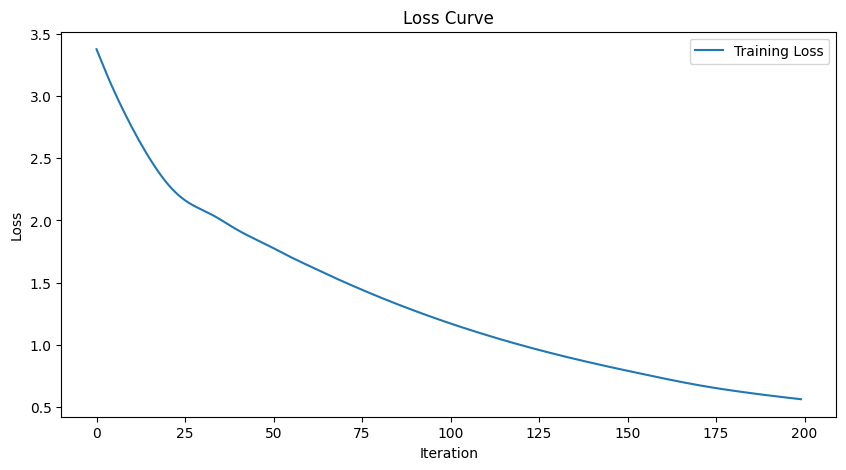

Mean Squared Error: 0.115
Negative Log Likelihood: 45.589
Mean Absolute Percentage Error: 33.067%


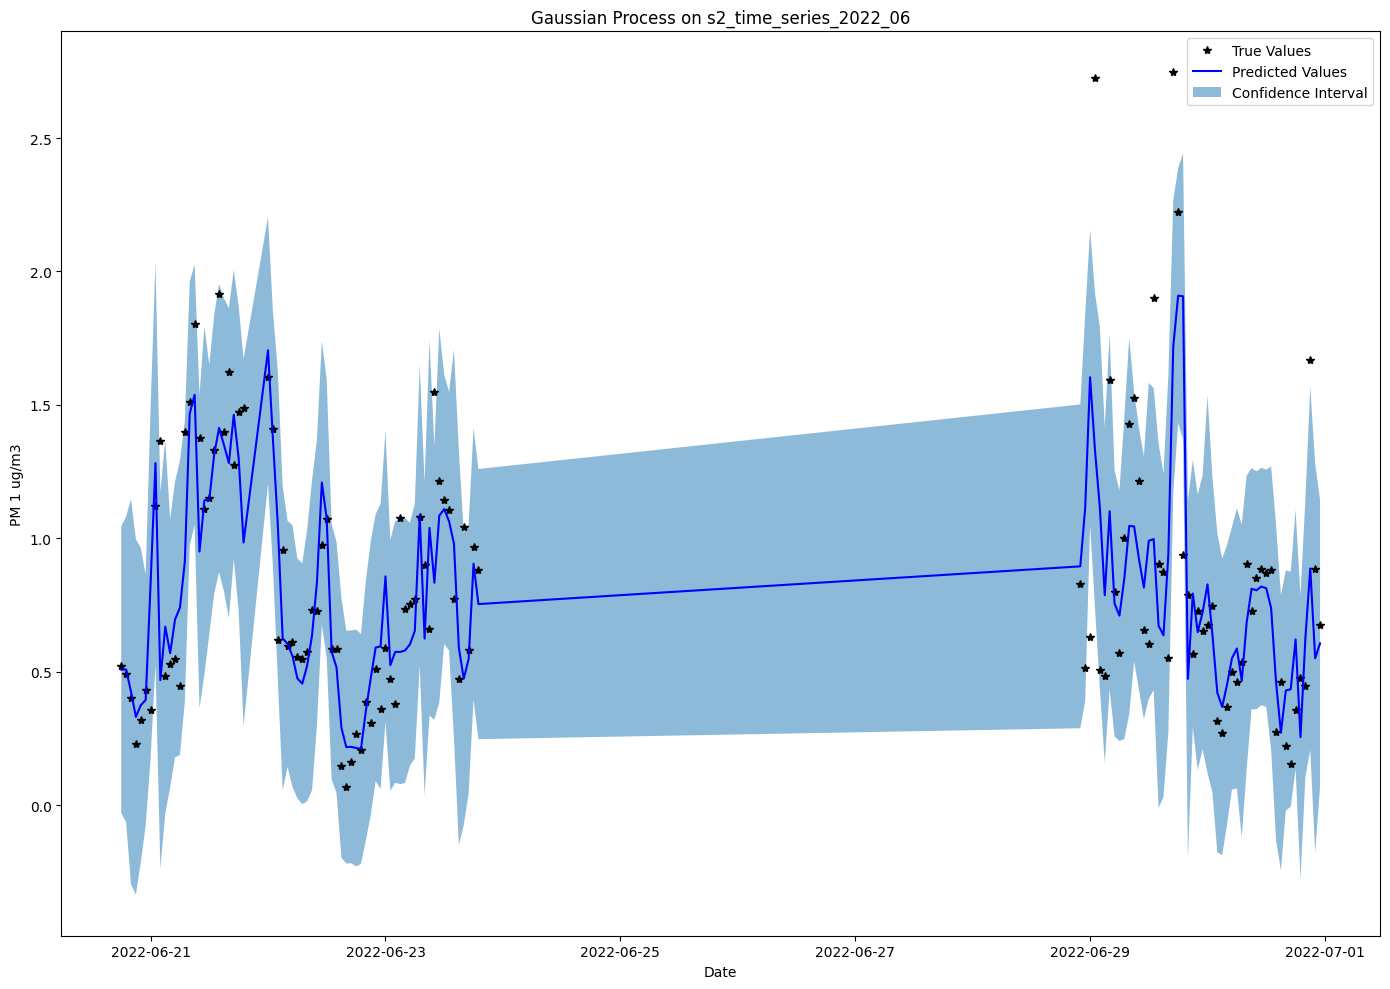

Iter 1/200 - Loss: 3.416
Iter 11/200 - Loss: 2.832
Iter 21/200 - Loss: 2.477
Iter 31/200 - Loss: 2.304
Iter 41/200 - Loss: 2.132
Iter 51/200 - Loss: 1.971
Iter 61/200 - Loss: 1.821
Iter 71/200 - Loss: 1.681
Iter 81/200 - Loss: 1.553
Iter 91/200 - Loss: 1.437
Iter 101/200 - Loss: 1.331
Iter 111/200 - Loss: 1.236
Iter 121/200 - Loss: 1.150
Iter 131/200 - Loss: 1.073
Iter 141/200 - Loss: 1.005
Iter 151/200 - Loss: 0.945
Iter 161/200 - Loss: 0.891
Iter 171/200 - Loss: 0.843
Iter 181/200 - Loss: 0.801
Iter 191/200 - Loss: 0.764


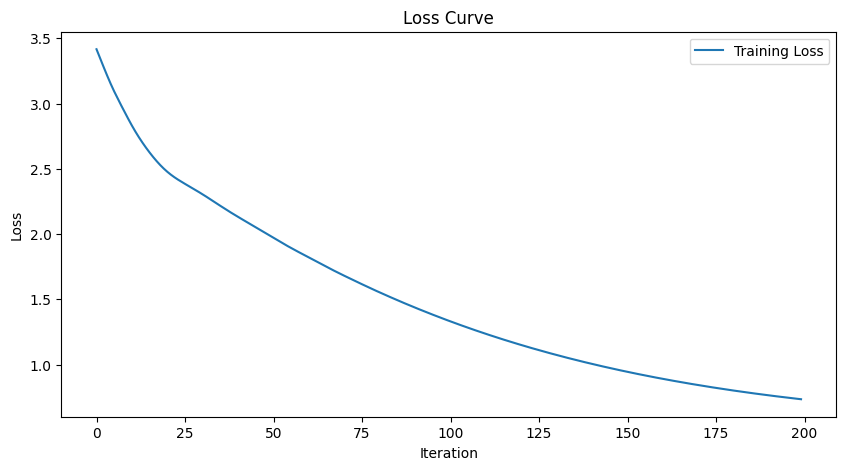

Mean Squared Error: 0.095
Negative Log Likelihood: 50.491
Mean Absolute Percentage Error: 36.724%


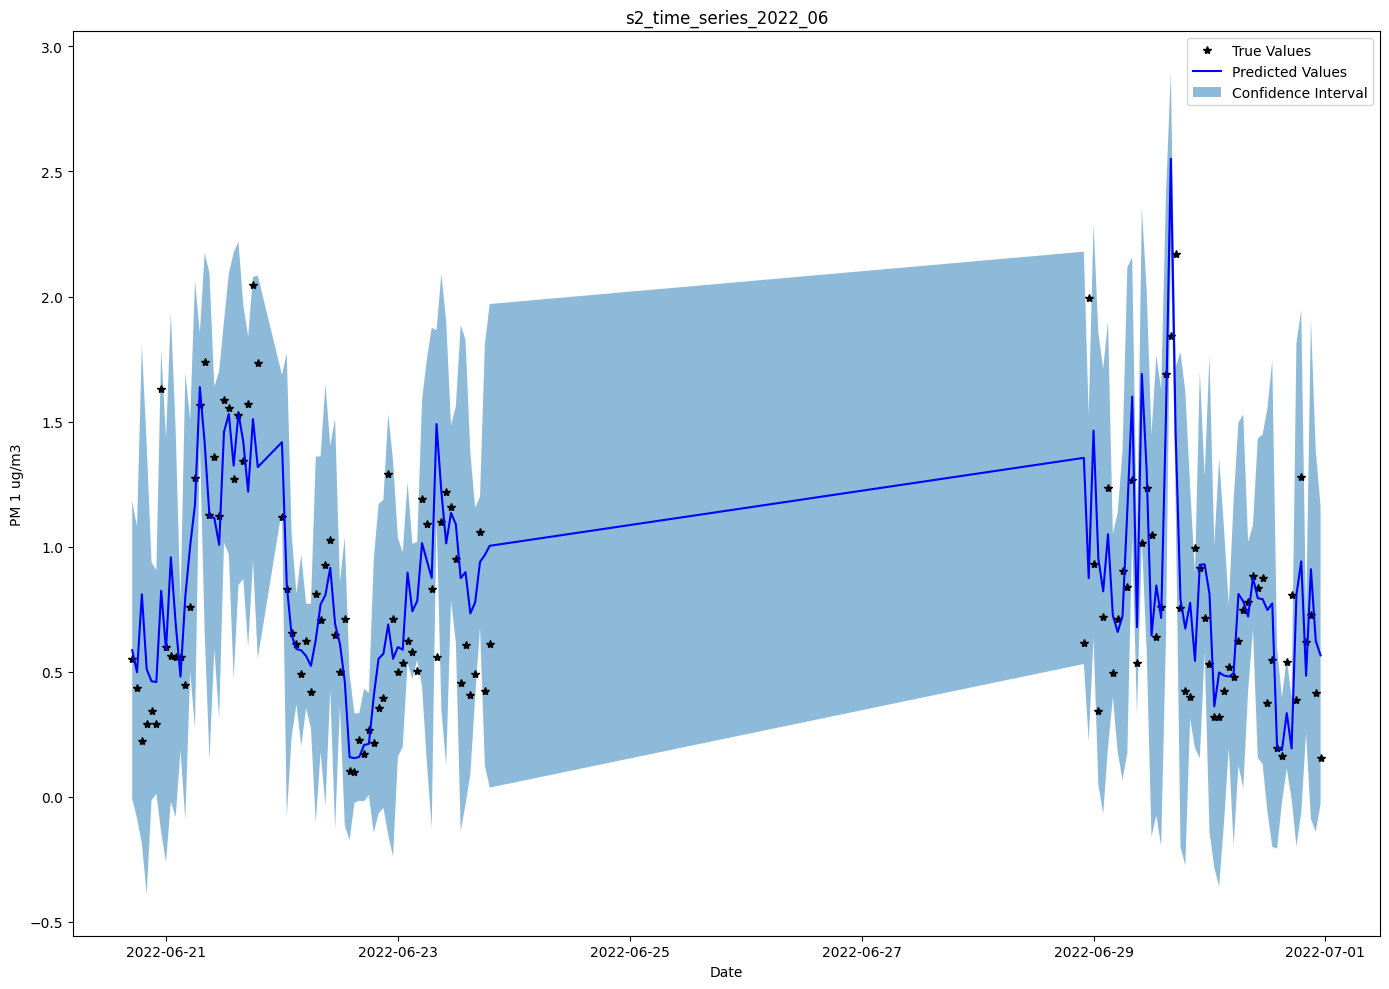

 
GP on s2 time series 2022 07 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 1.947
Iter 11/200 - Loss: 1.759
Iter 21/200 - Loss: 1.682
Iter 31/200 - Loss: 1.614
Iter 41/200 - Loss: 1.560
Iter 51/200 - Loss: 1.506
Iter 61/200 - Loss: 1.455
Iter 71/200 - Loss: 1.410
Iter 81/200 - Loss: 1.368
Iter 91/200 - Loss: 1.330
Iter 101/200 - Loss: 1.295
Iter 111/200 - Loss: 1.263
Iter 121/200 - Loss: 1.234
Iter 131/200 - Loss: 1.208
Iter 141/200 - Loss: 1.184
Iter 151/200 - Loss: 1.163
Iter 161/200 - Loss: 1.144
Iter 171/200 - Loss: 1.127
Iter 181/200 - Loss: 1.113
Iter 191/200 - Loss: 1.100


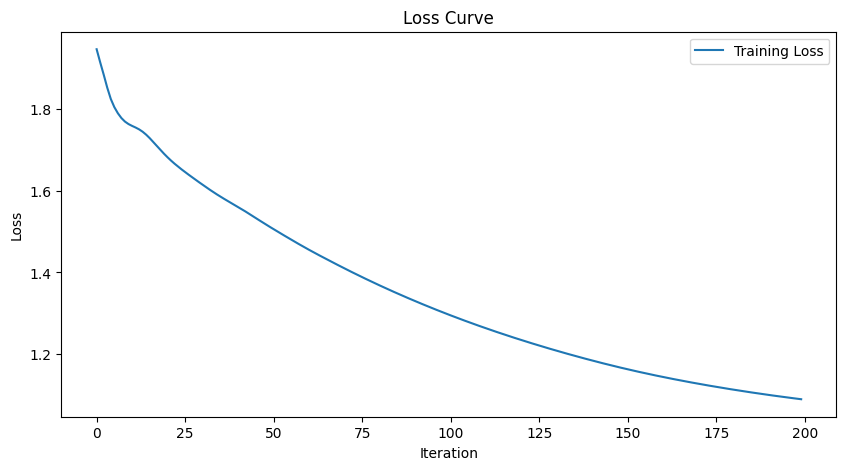

Mean Squared Error: 0.462
Negative Log Likelihood: 363.345
Mean Absolute Percentage Error: 72.991%


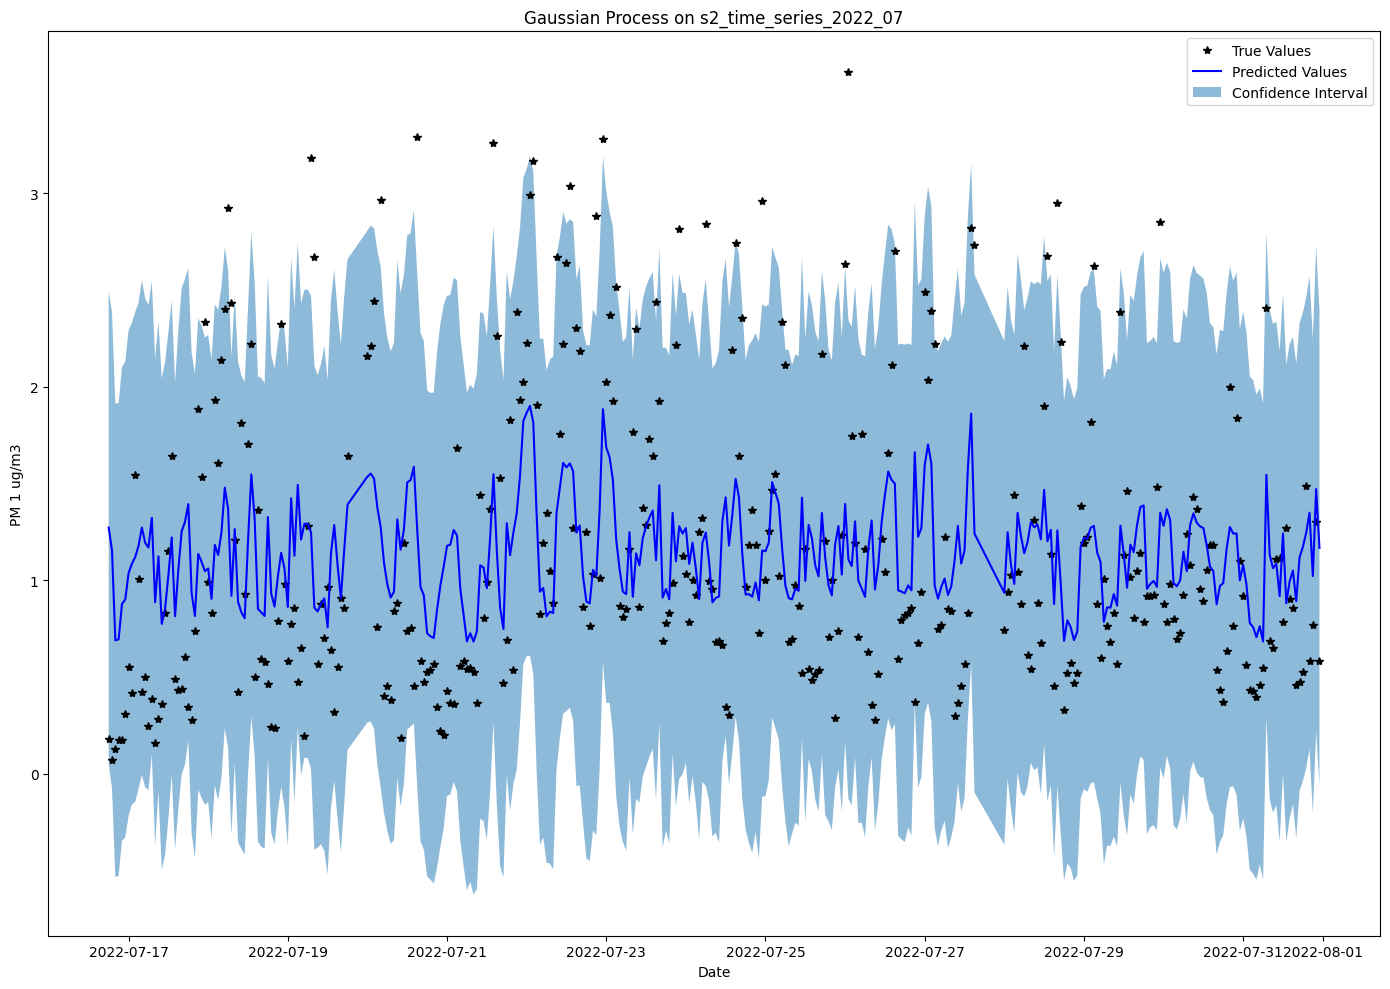

Iter 1/200 - Loss: 1.988
Iter 11/200 - Loss: 1.850
Iter 21/200 - Loss: 1.768
Iter 31/200 - Loss: 1.698
Iter 41/200 - Loss: 1.642
Iter 51/200 - Loss: 1.587
Iter 61/200 - Loss: 1.535
Iter 71/200 - Loss: 1.488
Iter 81/200 - Loss: 1.444
Iter 91/200 - Loss: 1.404
Iter 101/200 - Loss: 1.368
Iter 111/200 - Loss: 1.336
Iter 121/200 - Loss: 1.308
Iter 131/200 - Loss: 1.283
Iter 141/200 - Loss: 1.260
Iter 151/200 - Loss: 1.240
Iter 161/200 - Loss: 1.222
Iter 171/200 - Loss: 1.206
Iter 181/200 - Loss: 1.193
Iter 191/200 - Loss: 1.181


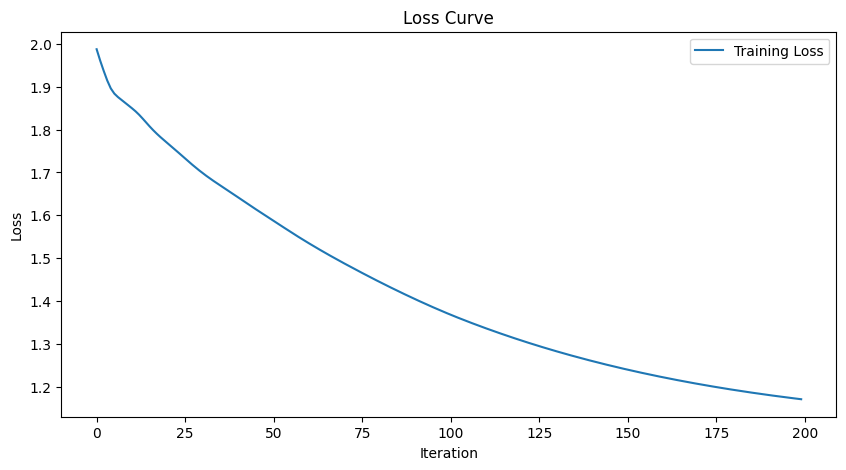

Mean Squared Error: 0.377
Negative Log Likelihood: 334.956
Mean Absolute Percentage Error: 65.857%


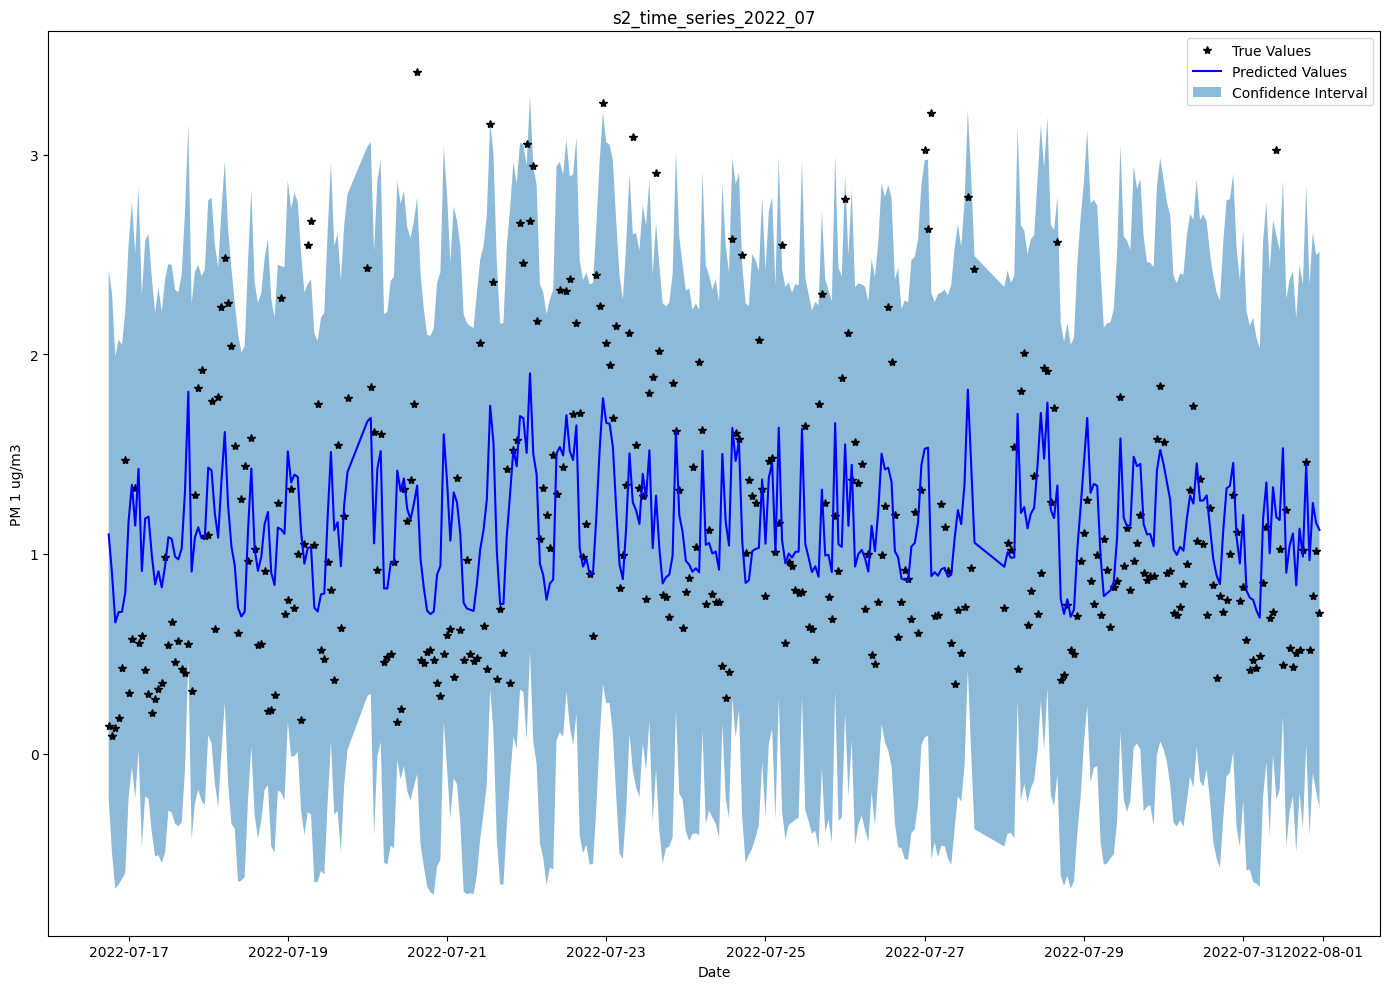

 
GP on s2 time series 2022 08 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 1.812
Iter 11/200 - Loss: 1.497
Iter 21/200 - Loss: 1.426
Iter 31/200 - Loss: 1.352
Iter 41/200 - Loss: 1.302
Iter 51/200 - Loss: 1.257
Iter 61/200 - Loss: 1.212
Iter 71/200 - Loss: 1.170
Iter 81/200 - Loss: 1.131
Iter 91/200 - Loss: 1.095
Iter 101/200 - Loss: 1.063
Iter 111/200 - Loss: 1.033
Iter 121/200 - Loss: 1.006
Iter 131/200 - Loss: 0.981
Iter 141/200 - Loss: 0.959
Iter 151/200 - Loss: 0.939
Iter 161/200 - Loss: 0.921
Iter 171/200 - Loss: 0.905
Iter 181/200 - Loss: 0.891
Iter 191/200 - Loss: 0.878


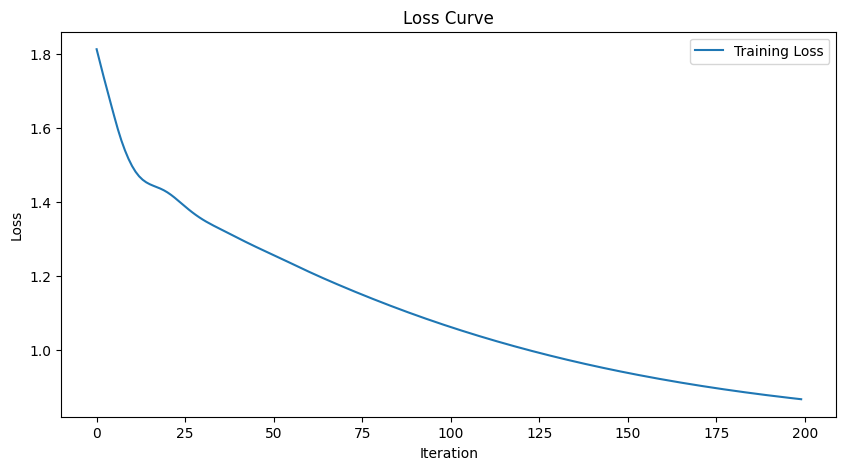

Mean Squared Error: 0.217
Negative Log Likelihood: 245.576
Mean Absolute Percentage Error: 46.301%


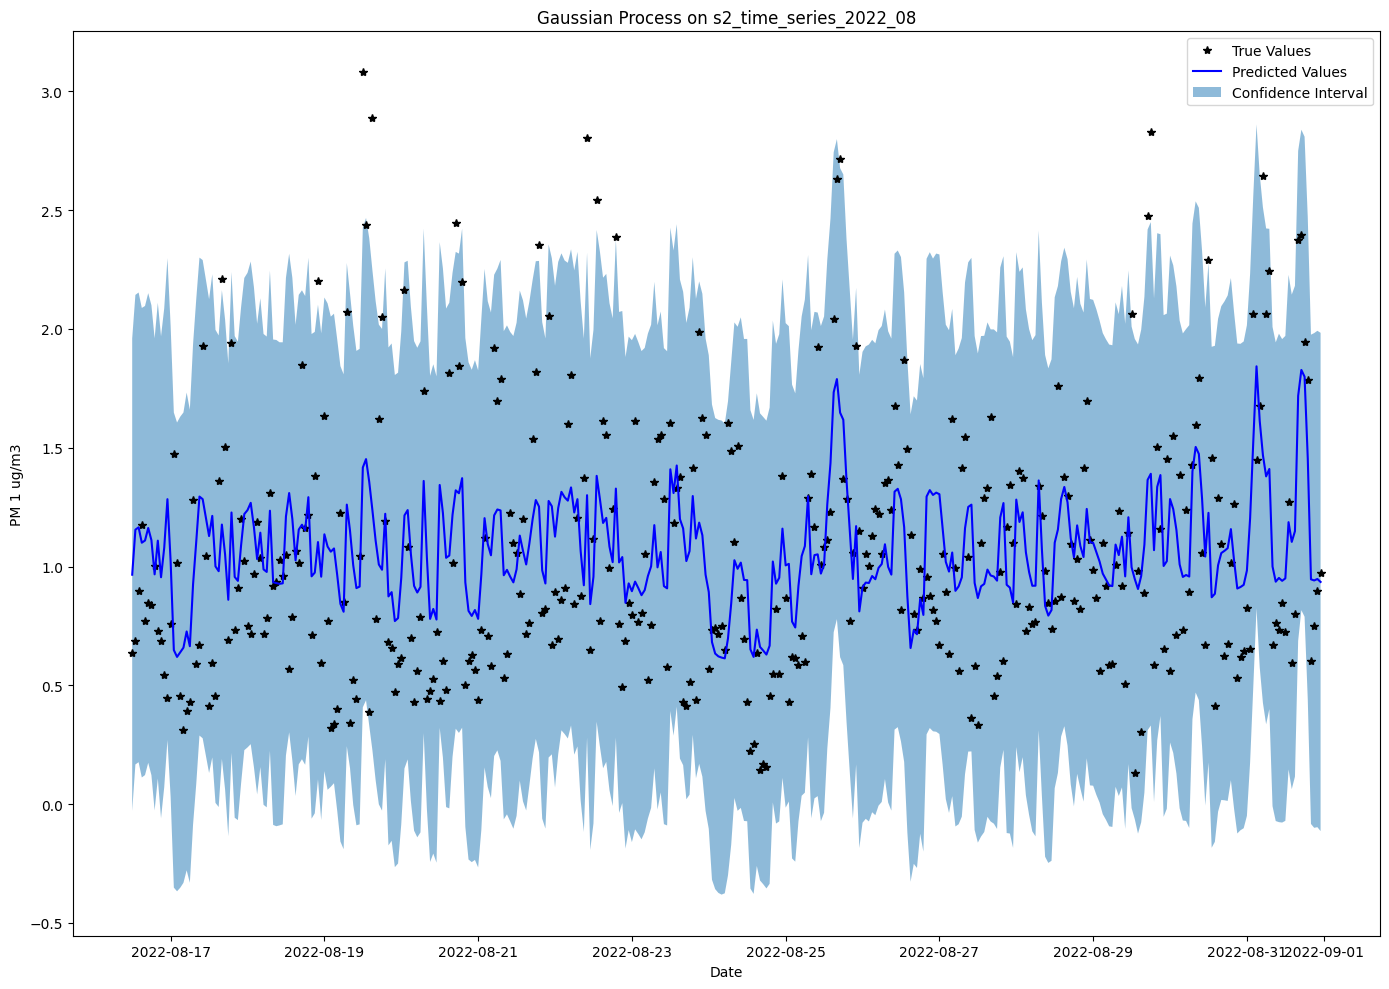

Iter 1/200 - Loss: 1.791
Iter 11/200 - Loss: 1.451
Iter 21/200 - Loss: 1.356
Iter 31/200 - Loss: 1.291
Iter 41/200 - Loss: 1.245
Iter 51/200 - Loss: 1.193
Iter 61/200 - Loss: 1.148
Iter 71/200 - Loss: 1.105
Iter 81/200 - Loss: 1.066
Iter 91/200 - Loss: 1.029
Iter 101/200 - Loss: 0.997
Iter 111/200 - Loss: 0.967
Iter 121/200 - Loss: 0.939
Iter 131/200 - Loss: 0.915
Iter 141/200 - Loss: 0.893
Iter 151/200 - Loss: 0.873
Iter 161/200 - Loss: 0.855
Iter 171/200 - Loss: 0.840
Iter 181/200 - Loss: 0.826
Iter 191/200 - Loss: 0.813


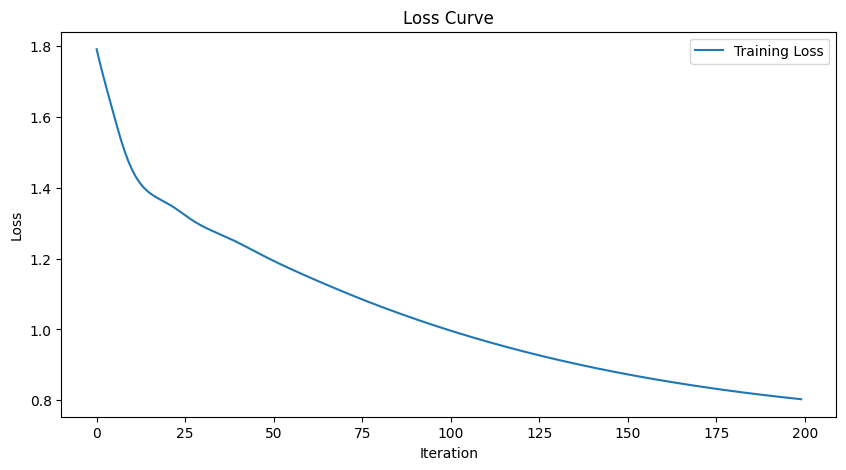

Mean Squared Error: 0.226
Negative Log Likelihood: 260.447
Mean Absolute Percentage Error: 42.508%


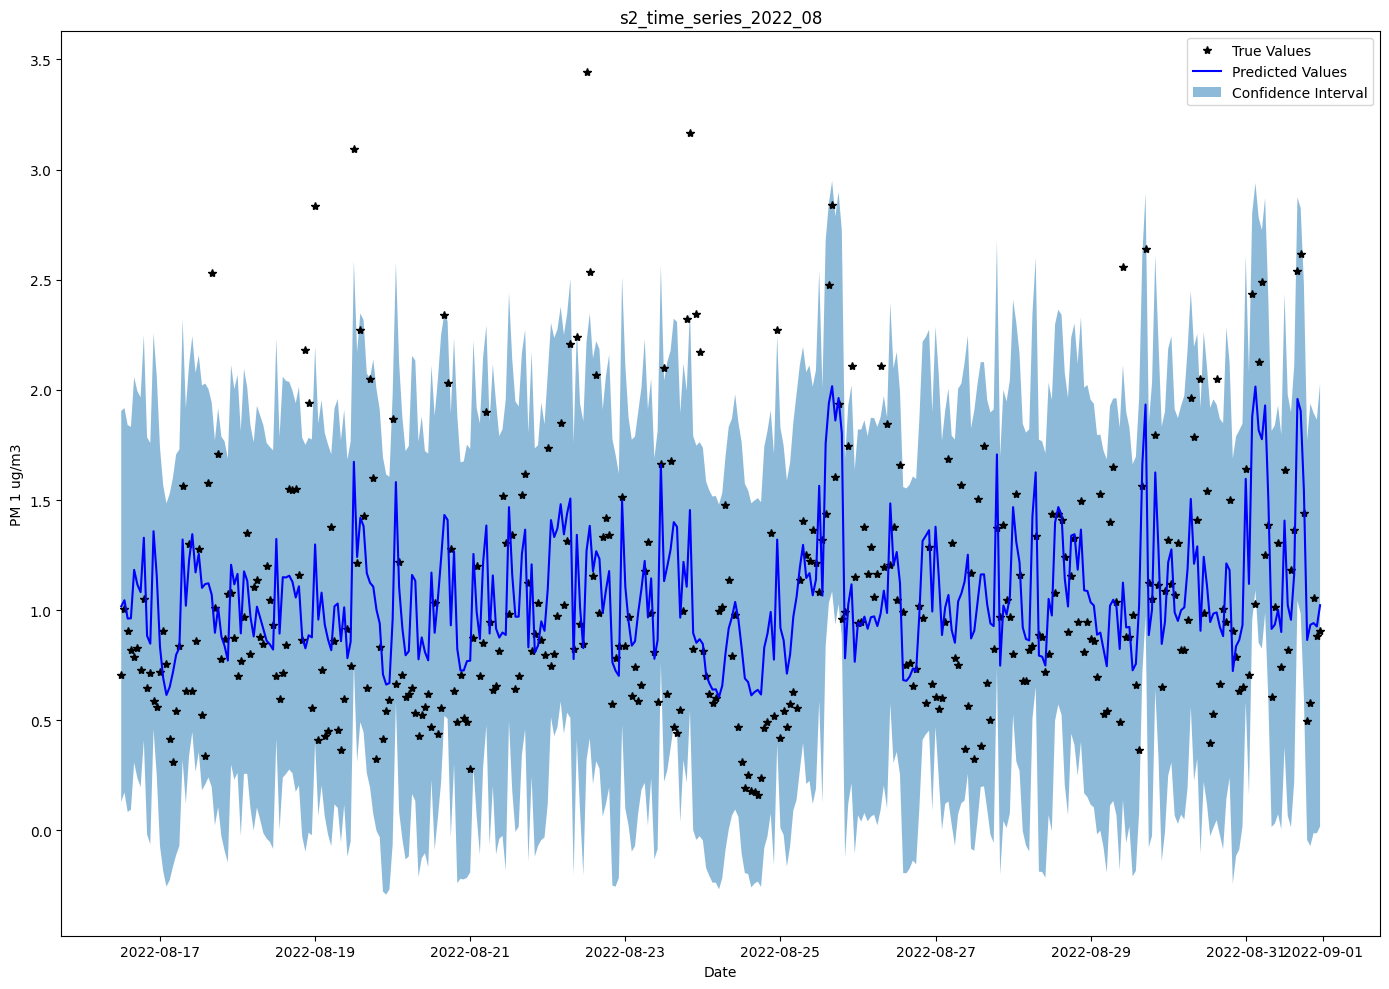

 
GP on s2 time series 2022 09 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 1.912
Iter 11/200 - Loss: 1.641
Iter 21/200 - Loss: 1.582
Iter 31/200 - Loss: 1.523
Iter 41/200 - Loss: 1.470
Iter 51/200 - Loss: 1.419
Iter 61/200 - Loss: 1.371
Iter 71/200 - Loss: 1.326
Iter 81/200 - Loss: 1.286
Iter 91/200 - Loss: 1.249
Iter 101/200 - Loss: 1.215
Iter 111/200 - Loss: 1.184
Iter 121/200 - Loss: 1.156
Iter 131/200 - Loss: 1.131
Iter 141/200 - Loss: 1.109
Iter 151/200 - Loss: 1.088
Iter 161/200 - Loss: 1.070
Iter 171/200 - Loss: 1.054
Iter 181/200 - Loss: 1.039
Iter 191/200 - Loss: 1.026


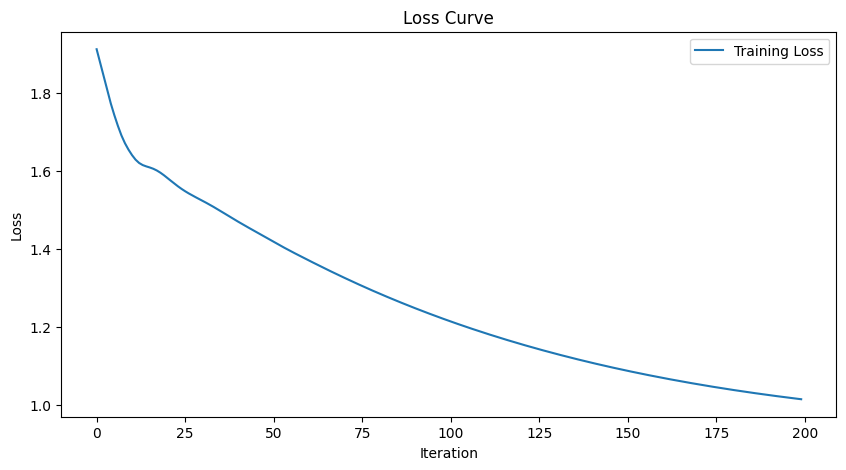

Mean Squared Error: 0.336
Negative Log Likelihood: 314.701
Mean Absolute Percentage Error: 38.937%


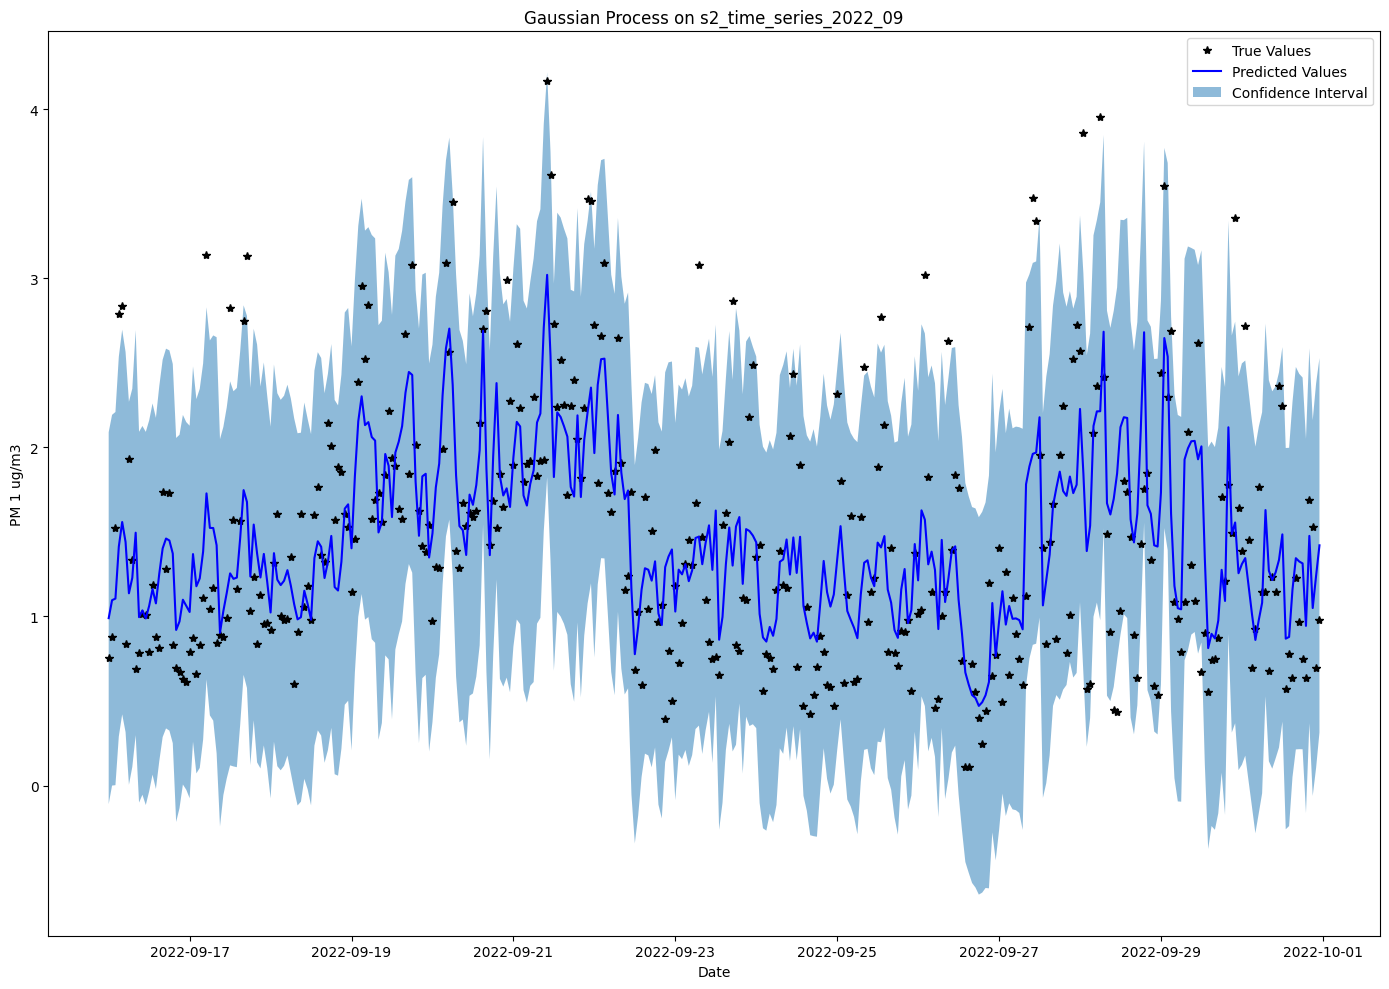

Iter 1/200 - Loss: 1.928
Iter 11/200 - Loss: 1.723
Iter 21/200 - Loss: 1.716
Iter 31/200 - Loss: 1.708
Iter 41/200 - Loss: 1.706
Iter 51/200 - Loss: 1.705
Iter 61/200 - Loss: 1.705
Iter 71/200 - Loss: 1.705
Iter 81/200 - Loss: 1.705
Iter 91/200 - Loss: 1.705
Iter 101/200 - Loss: 1.705
Iter 111/200 - Loss: 1.705
Iter 121/200 - Loss: 1.705
Iter 131/200 - Loss: 1.705
Iter 141/200 - Loss: 1.705
Iter 151/200 - Loss: 1.705
Iter 161/200 - Loss: 1.705
Iter 171/200 - Loss: 1.705
Iter 181/200 - Loss: 1.705
Iter 191/200 - Loss: 1.705


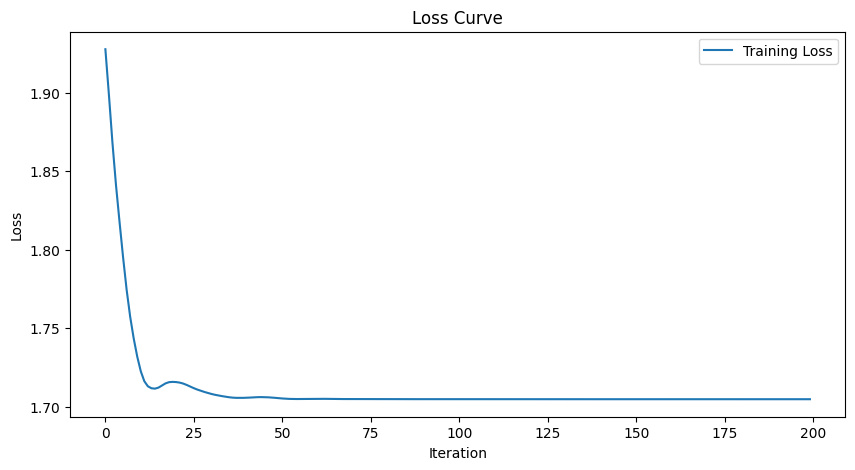

Mean Squared Error: 0.296
Negative Log Likelihood: 296.020
Mean Absolute Percentage Error: 40.954%


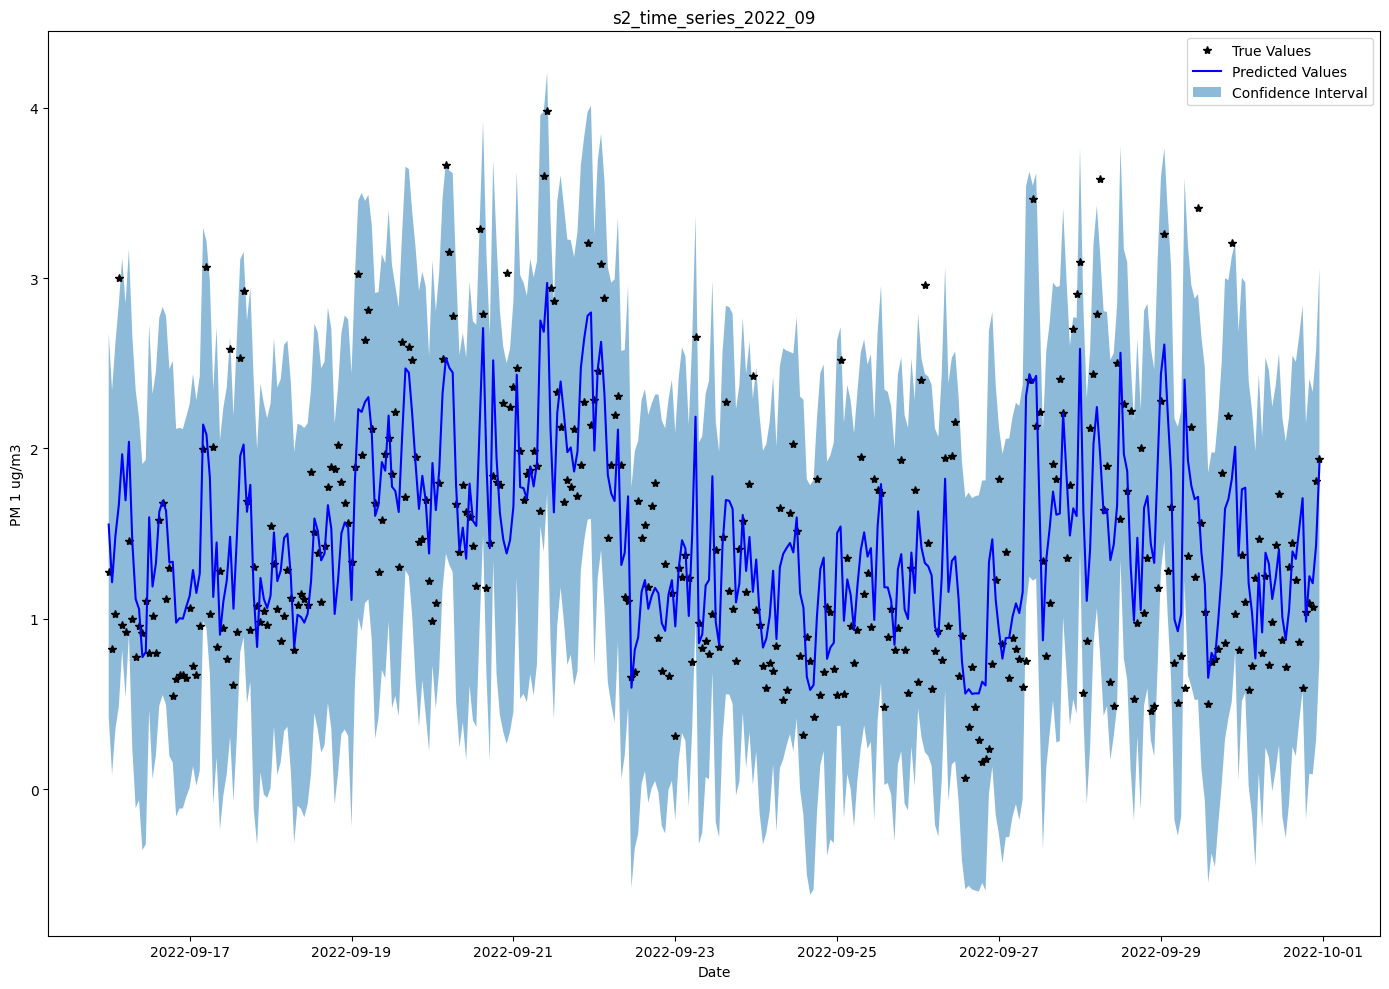

 
GP on s2 time series 2022 10 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 2.356
Iter 11/200 - Loss: 2.181
Iter 21/200 - Loss: 2.119
Iter 31/200 - Loss: 2.053
Iter 41/200 - Loss: 1.977
Iter 51/200 - Loss: 1.903
Iter 61/200 - Loss: 1.834
Iter 71/200 - Loss: 1.771
Iter 81/200 - Loss: 1.713
Iter 91/200 - Loss: 1.661
Iter 101/200 - Loss: 1.613
Iter 111/200 - Loss: 1.569
Iter 121/200 - Loss: 1.530
Iter 131/200 - Loss: 1.495
Iter 141/200 - Loss: 1.463
Iter 151/200 - Loss: 1.434
Iter 161/200 - Loss: 1.408
Iter 171/200 - Loss: 1.385
Iter 181/200 - Loss: 1.365
Iter 191/200 - Loss: 1.346


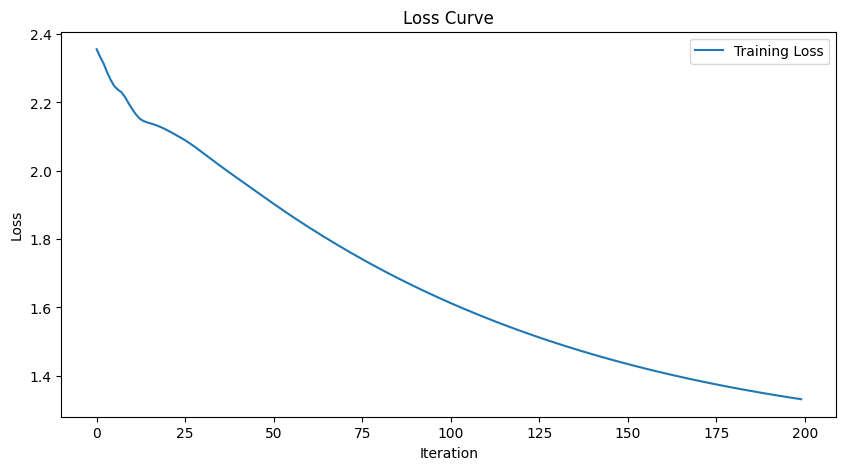

Mean Squared Error: 0.449
Negative Log Likelihood: 279.031
Mean Absolute Percentage Error: 54.904%


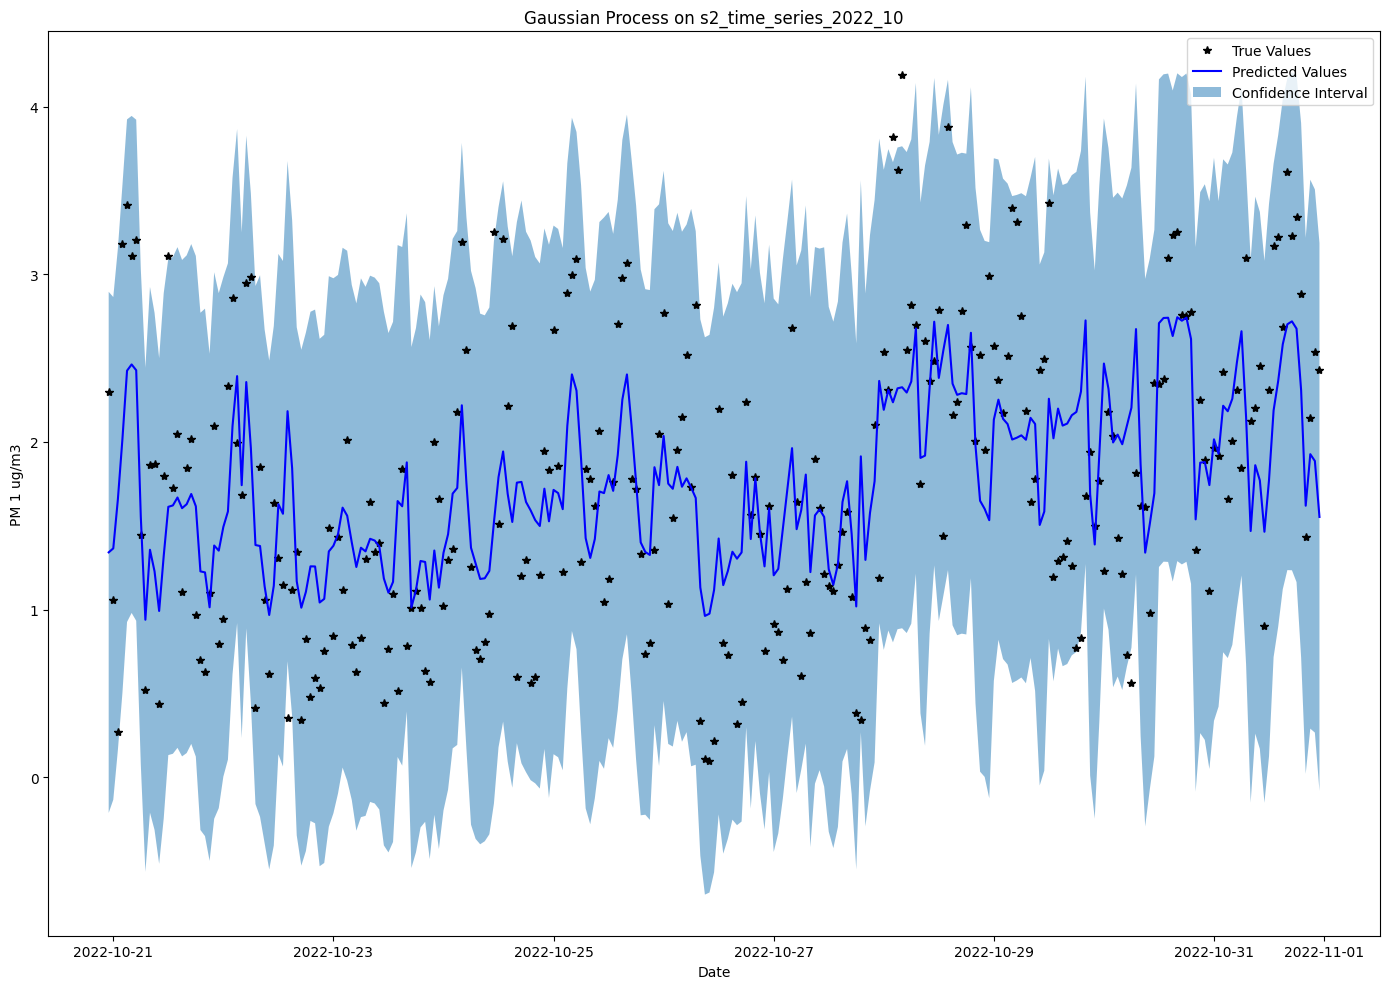

Iter 1/200 - Loss: 2.311
Iter 11/200 - Loss: 2.164
Iter 21/200 - Loss: 2.130
Iter 31/200 - Loss: 2.128
Iter 41/200 - Loss: 2.125
Iter 51/200 - Loss: 2.124
Iter 61/200 - Loss: 2.123
Iter 71/200 - Loss: 2.122
Iter 81/200 - Loss: 2.122
Iter 91/200 - Loss: 2.122
Iter 101/200 - Loss: 2.121
Iter 111/200 - Loss: 2.121
Iter 121/200 - Loss: 2.121
Iter 131/200 - Loss: 2.121
Iter 141/200 - Loss: 2.121
Iter 151/200 - Loss: 2.121
Iter 161/200 - Loss: 2.121
Iter 171/200 - Loss: 2.120
Iter 181/200 - Loss: 2.120
Iter 191/200 - Loss: 2.120


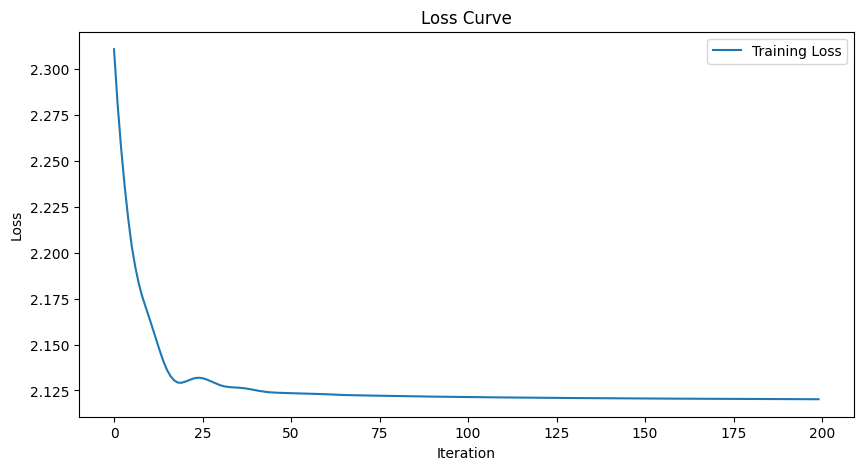

Mean Squared Error: 0.541
Negative Log Likelihood: 296.780
Mean Absolute Percentage Error: 52.478%


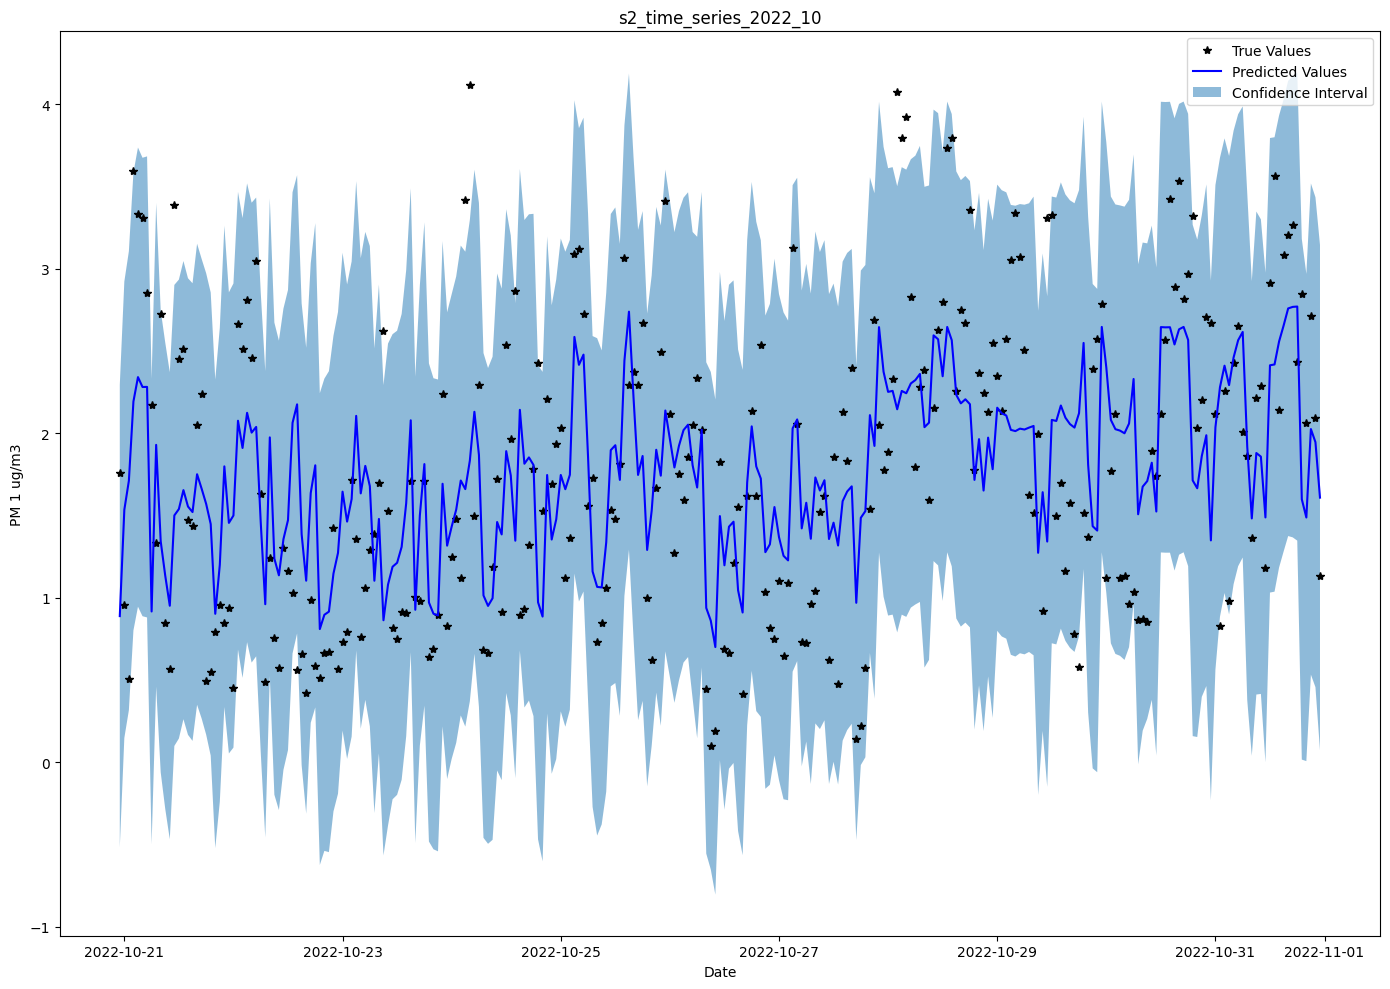

 
GP on s2 time series 2022 11 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 2.318
Iter 11/200 - Loss: 2.178
Iter 21/200 - Loss: 2.141
Iter 31/200 - Loss: 2.104
Iter 41/200 - Loss: 2.026
Iter 51/200 - Loss: 1.932
Iter 61/200 - Loss: 1.837
Iter 71/200 - Loss: 1.757
Iter 81/200 - Loss: 1.688
Iter 91/200 - Loss: 1.627
Iter 101/200 - Loss: 1.572
Iter 111/200 - Loss: 1.523
Iter 121/200 - Loss: 1.478
Iter 131/200 - Loss: 1.438
Iter 141/200 - Loss: 1.401
Iter 151/200 - Loss: 1.368
Iter 161/200 - Loss: 1.339
Iter 171/200 - Loss: 1.313
Iter 181/200 - Loss: 1.290
Iter 191/200 - Loss: 1.270


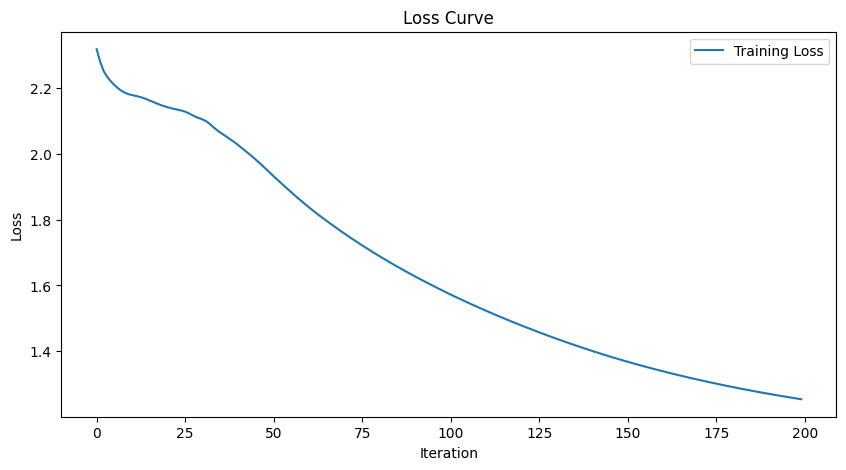

Mean Squared Error: 0.441
Negative Log Likelihood: 263.258
Mean Absolute Percentage Error: 34.279%


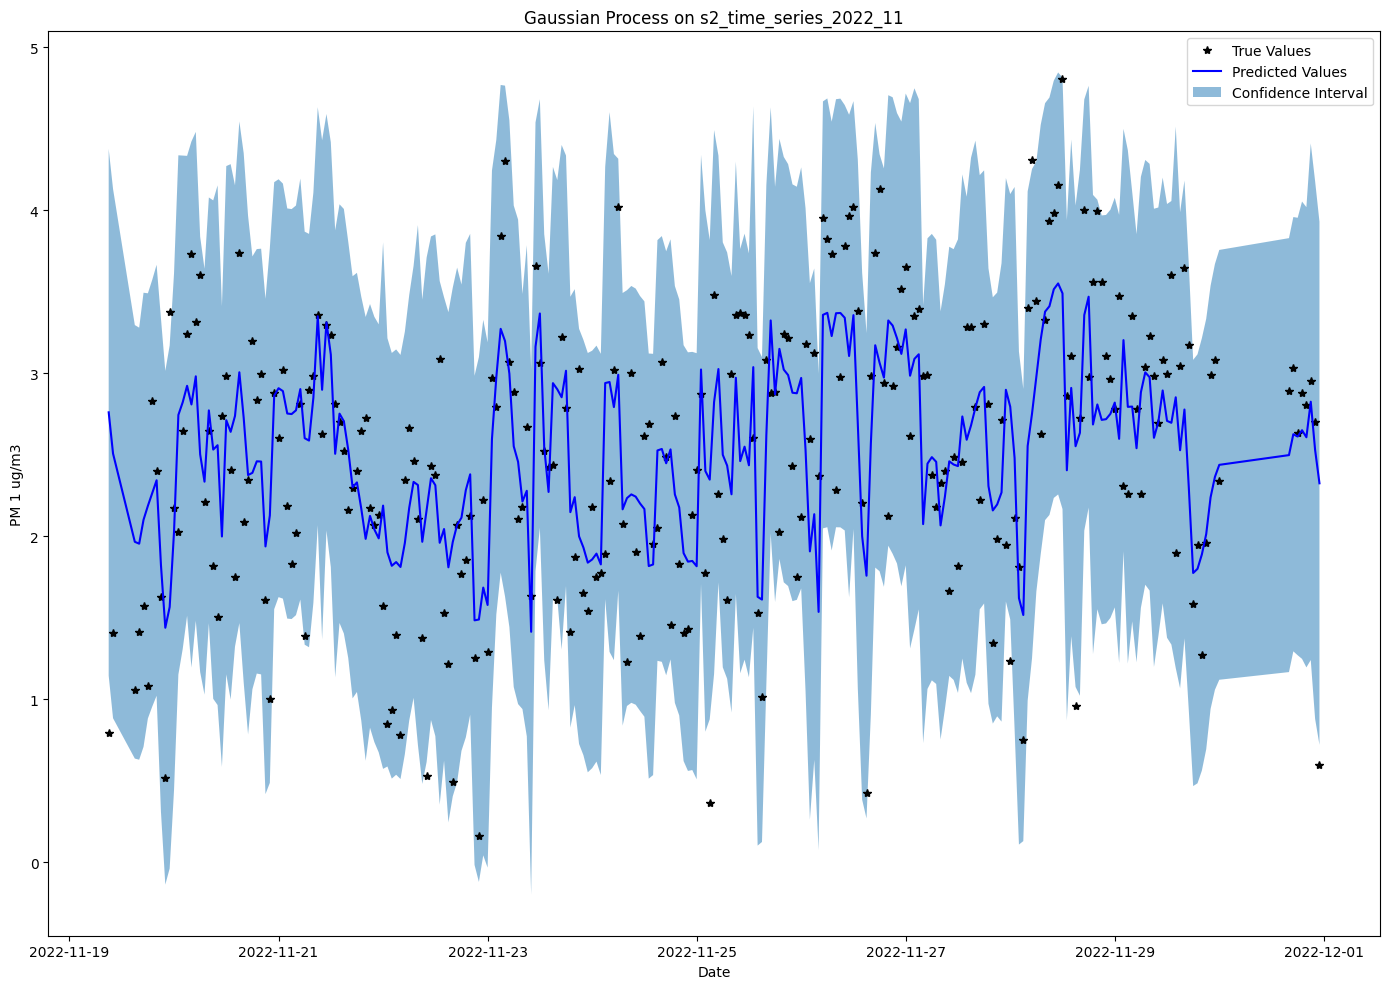

Iter 1/200 - Loss: 2.332
Iter 11/200 - Loss: 2.163
Iter 21/200 - Loss: 2.080
Iter 31/200 - Loss: 2.012
Iter 41/200 - Loss: 1.926
Iter 51/200 - Loss: 1.842
Iter 61/200 - Loss: 1.770
Iter 71/200 - Loss: 1.707
Iter 81/200 - Loss: 1.649
Iter 91/200 - Loss: 1.597
Iter 101/200 - Loss: 1.549
Iter 111/200 - Loss: 1.505
Iter 121/200 - Loss: 1.465
Iter 131/200 - Loss: 1.428
Iter 141/200 - Loss: 1.394
Iter 151/200 - Loss: 1.363
Iter 161/200 - Loss: 1.336
Iter 171/200 - Loss: 1.311
Iter 181/200 - Loss: 1.289
Iter 191/200 - Loss: 1.270


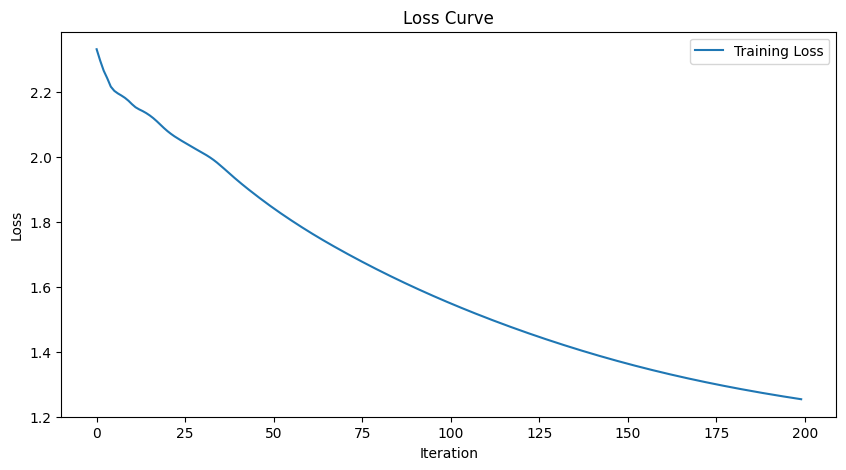

Mean Squared Error: 0.455
Negative Log Likelihood: 264.762
Mean Absolute Percentage Error: 28.945%


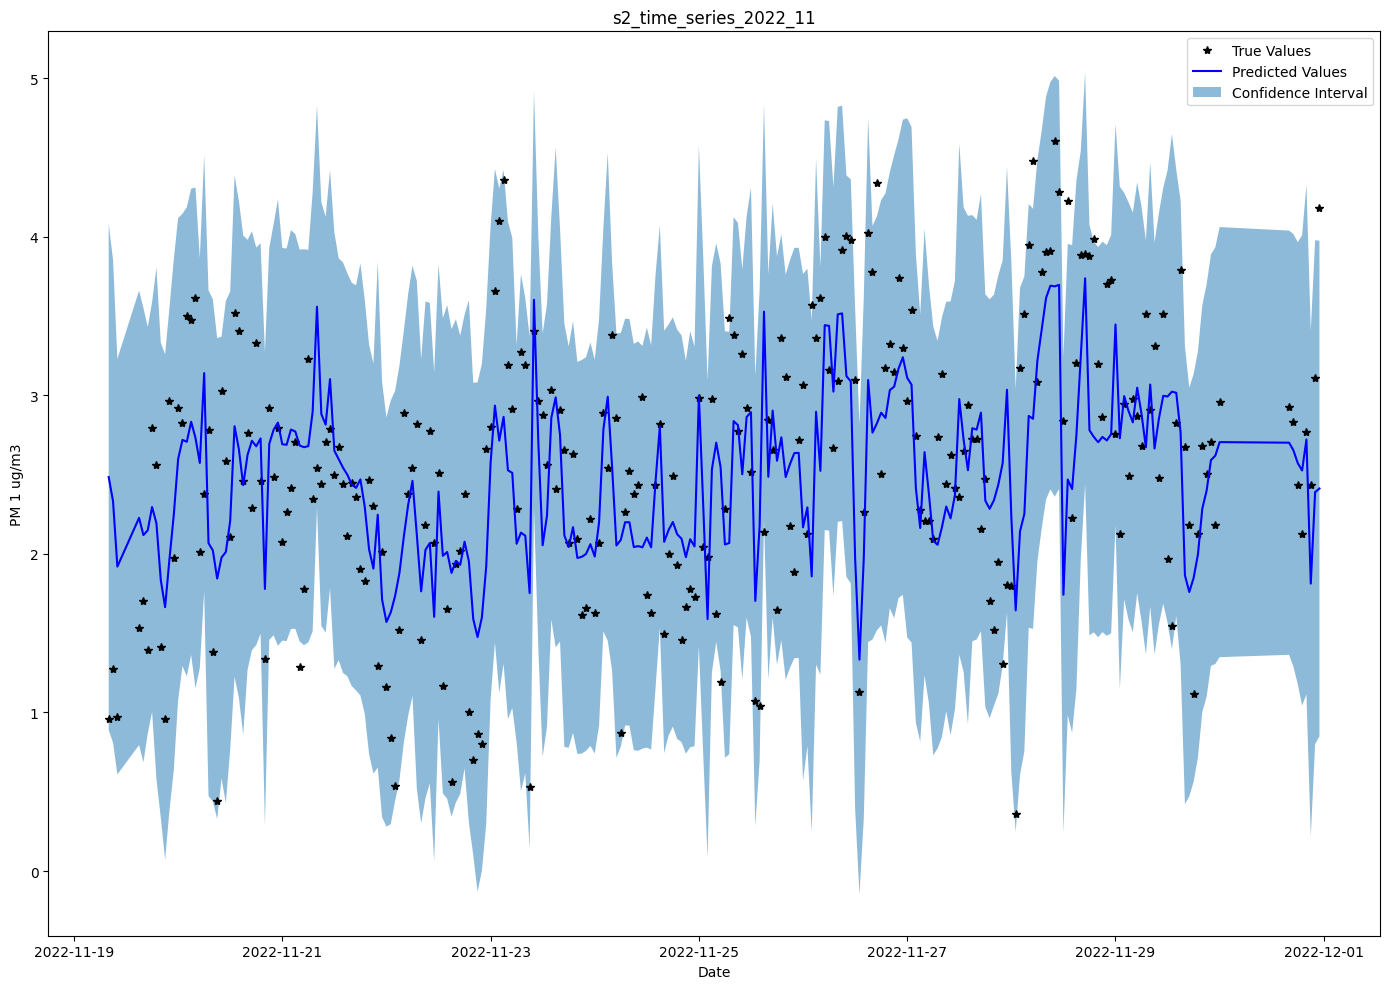

 
GP on s2 time series 2022 12 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 1.998
Iter 11/200 - Loss: 1.884
Iter 21/200 - Loss: 1.849
Iter 31/200 - Loss: 1.846
Iter 41/200 - Loss: 1.844
Iter 51/200 - Loss: 1.818
Iter 61/200 - Loss: 1.770
Iter 71/200 - Loss: 1.699
Iter 81/200 - Loss: 1.624
Iter 91/200 - Loss: 1.557
Iter 101/200 - Loss: 1.497
Iter 111/200 - Loss: 1.446
Iter 121/200 - Loss: 1.400
Iter 131/200 - Loss: 1.360
Iter 141/200 - Loss: 1.326
Iter 151/200 - Loss: 1.295
Iter 161/200 - Loss: 1.268
Iter 171/200 - Loss: 1.244
Iter 181/200 - Loss: 1.223
Iter 191/200 - Loss: 1.205


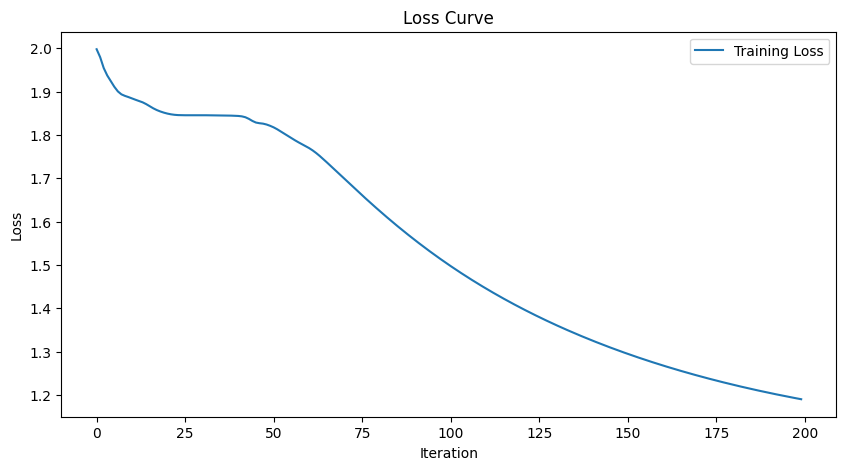

Mean Squared Error: 0.463
Negative Log Likelihood: 351.526
Mean Absolute Percentage Error: 28.053%


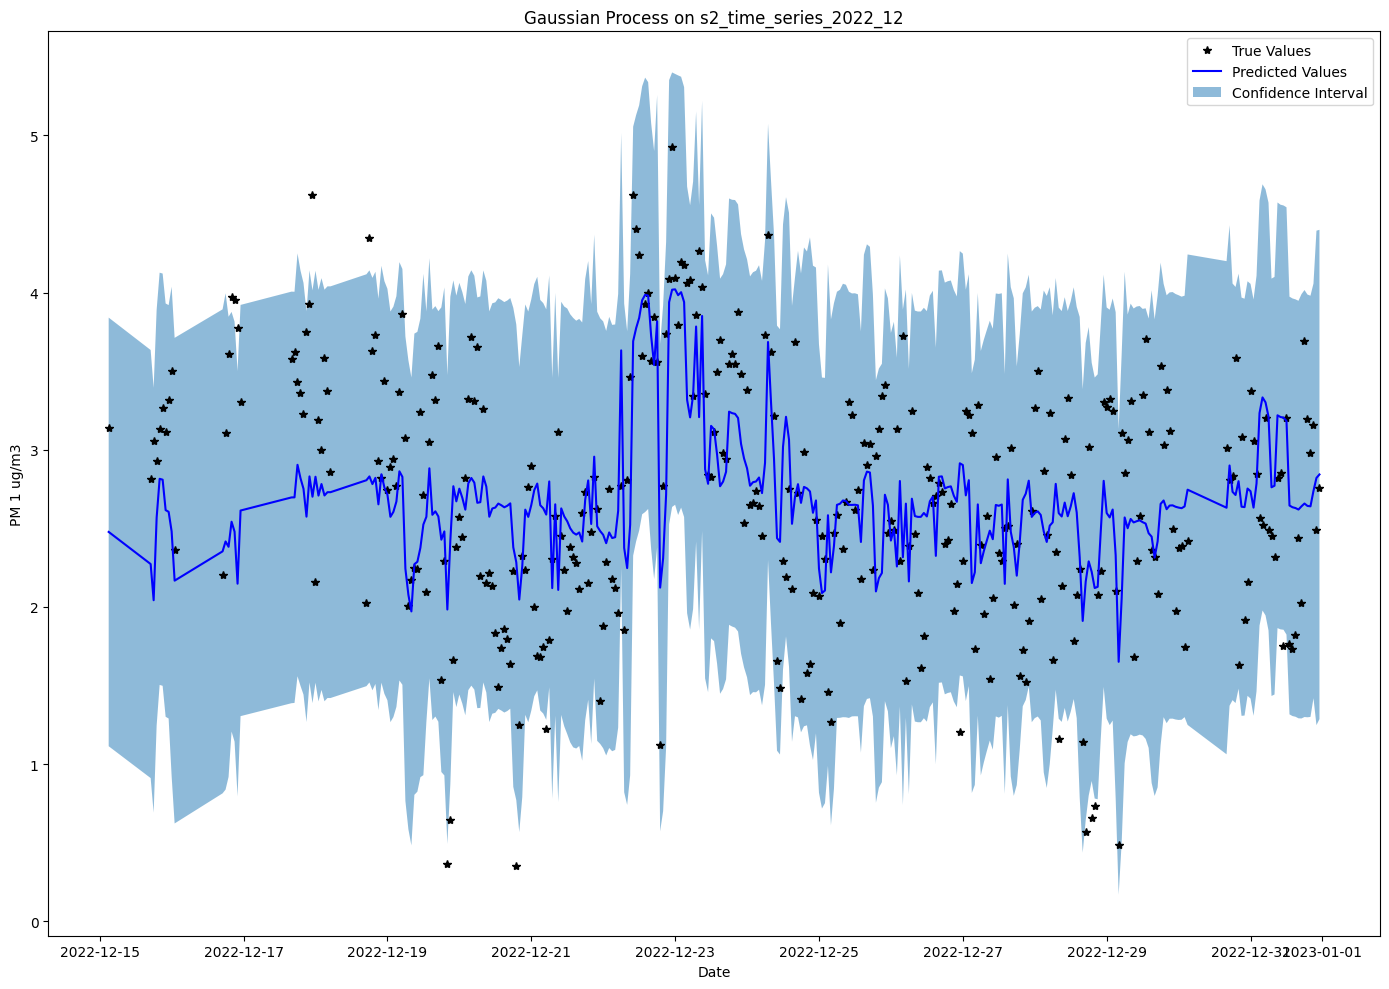

Iter 1/200 - Loss: 2.026
Iter 11/200 - Loss: 1.901
Iter 21/200 - Loss: 1.827
Iter 31/200 - Loss: 1.767
Iter 41/200 - Loss: 1.709
Iter 51/200 - Loss: 1.648
Iter 61/200 - Loss: 1.592
Iter 71/200 - Loss: 1.541
Iter 81/200 - Loss: 1.494
Iter 91/200 - Loss: 1.451
Iter 101/200 - Loss: 1.413
Iter 111/200 - Loss: 1.378
Iter 121/200 - Loss: 1.347
Iter 131/200 - Loss: 1.318
Iter 141/200 - Loss: 1.293
Iter 151/200 - Loss: 1.270
Iter 161/200 - Loss: 1.250
Iter 171/200 - Loss: 1.232
Iter 181/200 - Loss: 1.216
Iter 191/200 - Loss: 1.202


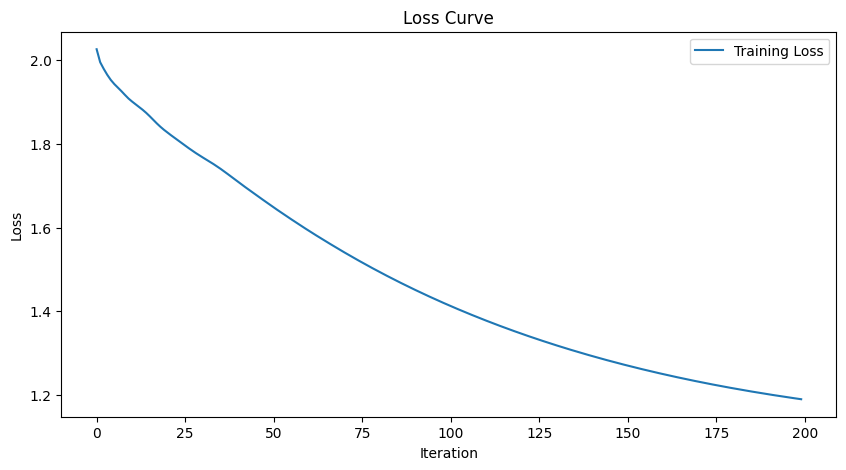

Mean Squared Error: 0.456
Negative Log Likelihood: 349.734
Mean Absolute Percentage Error: 27.353%


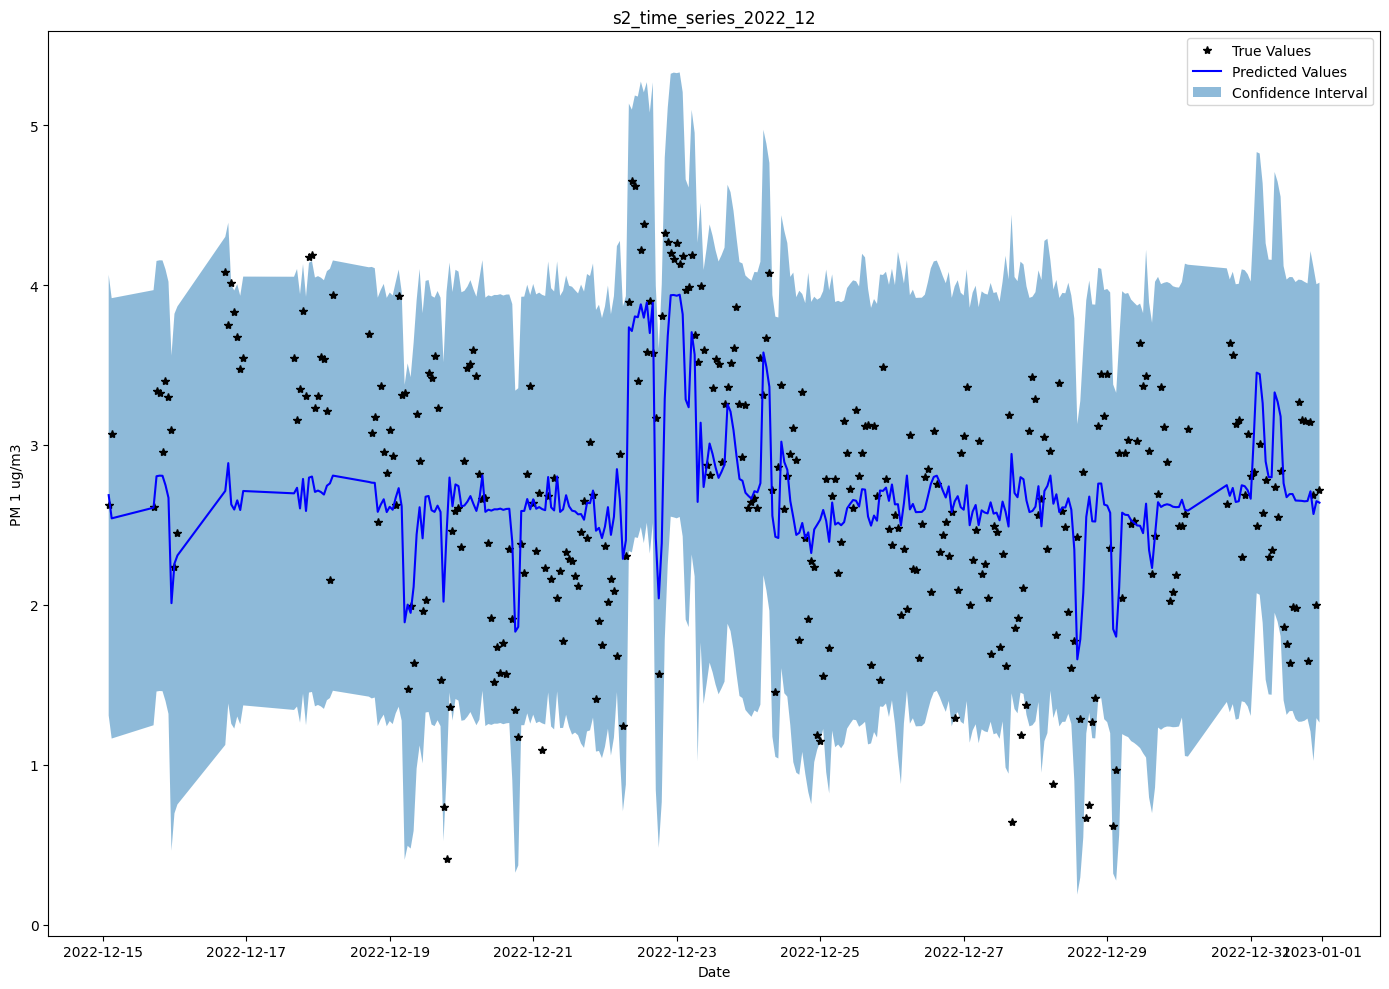

 
GP on s2 time series 2023 01 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 2.423
Iter 11/200 - Loss: 2.252
Iter 21/200 - Loss: 2.124
Iter 31/200 - Loss: 2.035
Iter 41/200 - Loss: 1.943
Iter 51/200 - Loss: 1.859
Iter 61/200 - Loss: 1.781
Iter 71/200 - Loss: 1.710
Iter 81/200 - Loss: 1.646
Iter 91/200 - Loss: 1.588
Iter 101/200 - Loss: 1.535
Iter 111/200 - Loss: 1.488
Iter 121/200 - Loss: 1.446
Iter 131/200 - Loss: 1.408
Iter 141/200 - Loss: 1.374
Iter 151/200 - Loss: 1.343
Iter 161/200 - Loss: 1.317
Iter 171/200 - Loss: 1.293
Iter 181/200 - Loss: 1.272
Iter 191/200 - Loss: 1.254


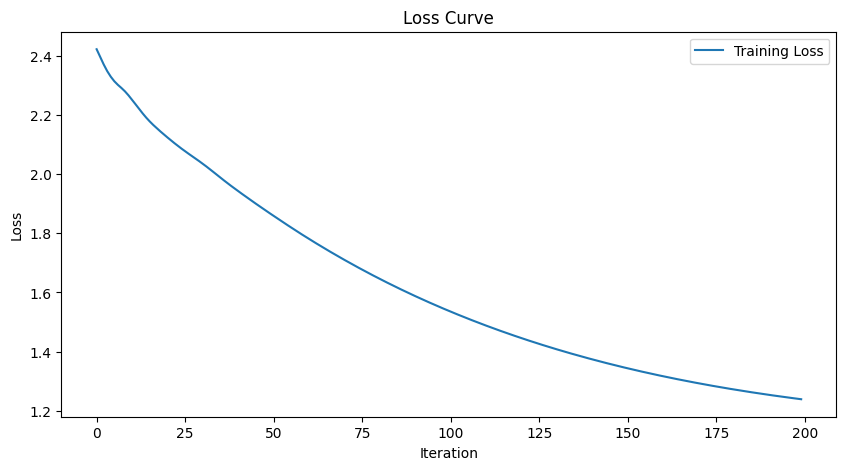

Mean Squared Error: 0.527
Negative Log Likelihood: 251.518
Mean Absolute Percentage Error: 37.746%


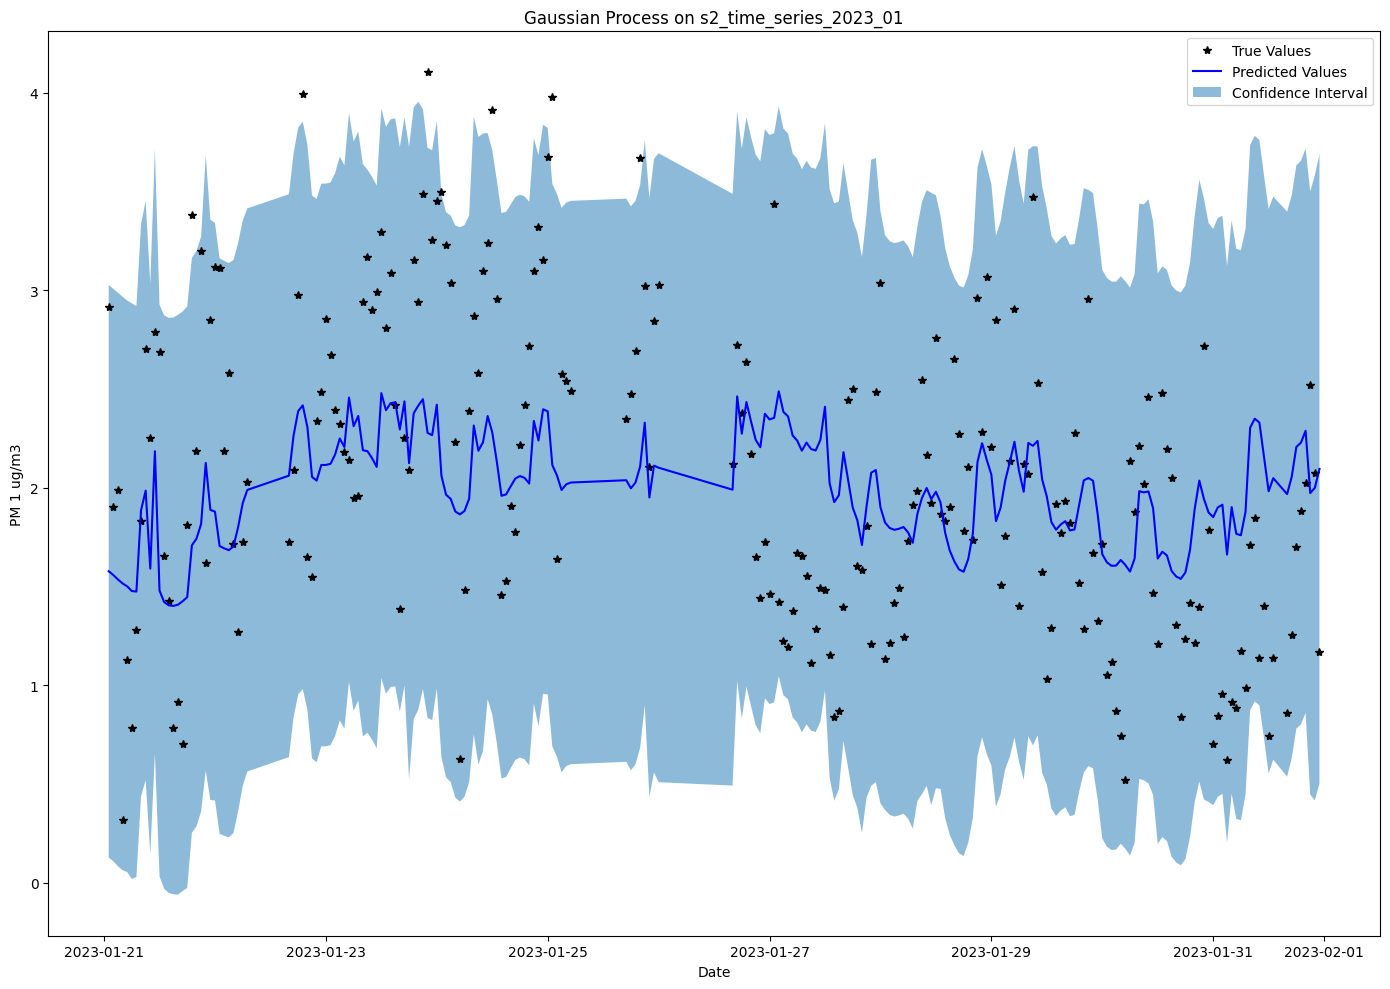

Iter 1/200 - Loss: 2.448
Iter 11/200 - Loss: 2.277
Iter 21/200 - Loss: 2.147
Iter 31/200 - Loss: 2.053
Iter 41/200 - Loss: 1.960
Iter 51/200 - Loss: 1.876
Iter 61/200 - Loss: 1.797
Iter 71/200 - Loss: 1.726
Iter 81/200 - Loss: 1.661
Iter 91/200 - Loss: 1.603
Iter 101/200 - Loss: 1.551
Iter 111/200 - Loss: 1.503
Iter 121/200 - Loss: 1.461
Iter 131/200 - Loss: 1.423
Iter 141/200 - Loss: 1.389
Iter 151/200 - Loss: 1.358
Iter 161/200 - Loss: 1.331
Iter 171/200 - Loss: 1.307
Iter 181/200 - Loss: 1.286
Iter 191/200 - Loss: 1.268


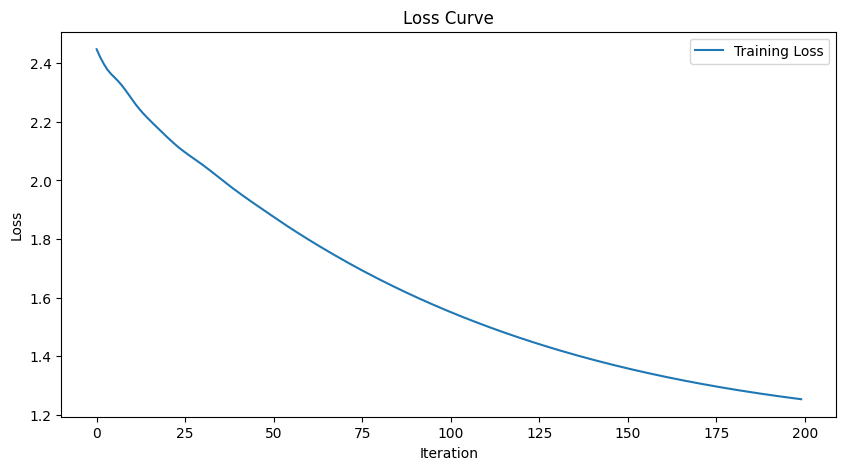

Mean Squared Error: 0.523
Negative Log Likelihood: 250.696
Mean Absolute Percentage Error: 45.084%


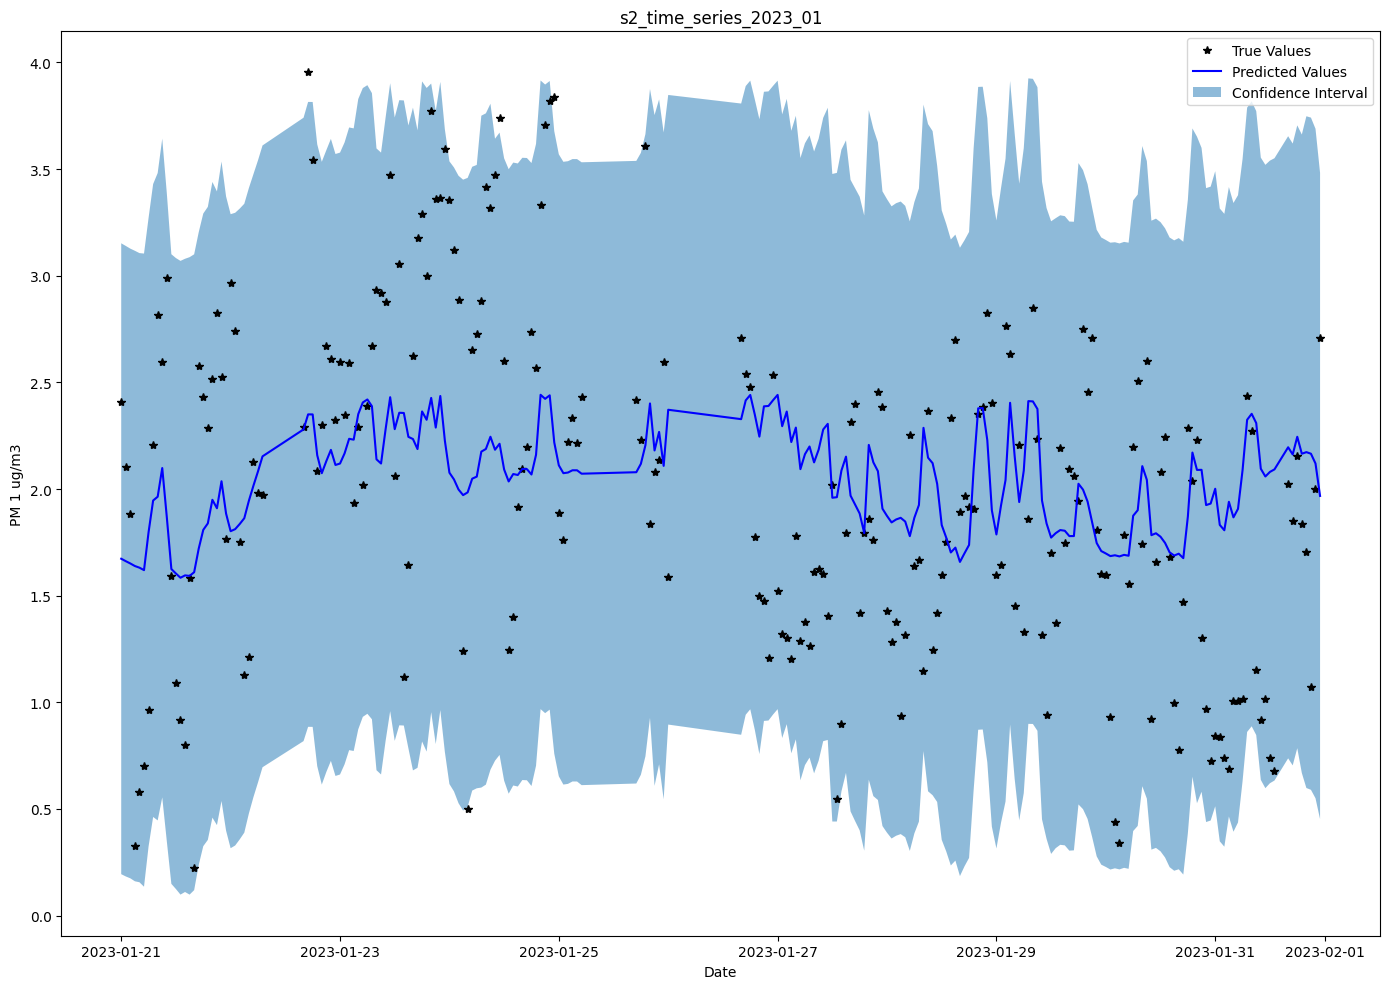

 
GP on s2 time series 2023 02 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 2.232
Iter 11/200 - Loss: 2.158
Iter 21/200 - Loss: 2.107
Iter 31/200 - Loss: 2.068
Iter 41/200 - Loss: 1.996
Iter 51/200 - Loss: 1.913
Iter 61/200 - Loss: 1.835
Iter 71/200 - Loss: 1.764
Iter 81/200 - Loss: 1.700
Iter 91/200 - Loss: 1.644
Iter 101/200 - Loss: 1.595
Iter 111/200 - Loss: 1.550
Iter 121/200 - Loss: 1.511
Iter 131/200 - Loss: 1.476
Iter 141/200 - Loss: 1.444
Iter 151/200 - Loss: 1.416
Iter 161/200 - Loss: 1.391
Iter 171/200 - Loss: 1.369
Iter 181/200 - Loss: 1.349
Iter 191/200 - Loss: 1.332


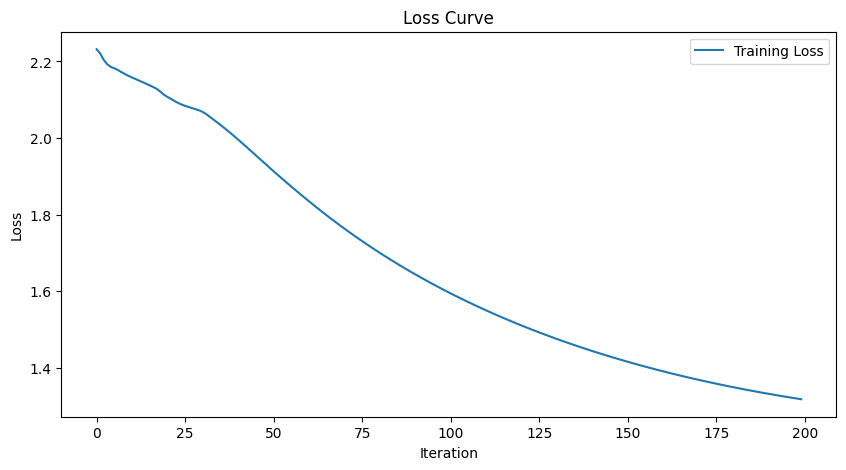

Mean Squared Error: 0.605
Negative Log Likelihood: 343.001
Mean Absolute Percentage Error: 41.015%


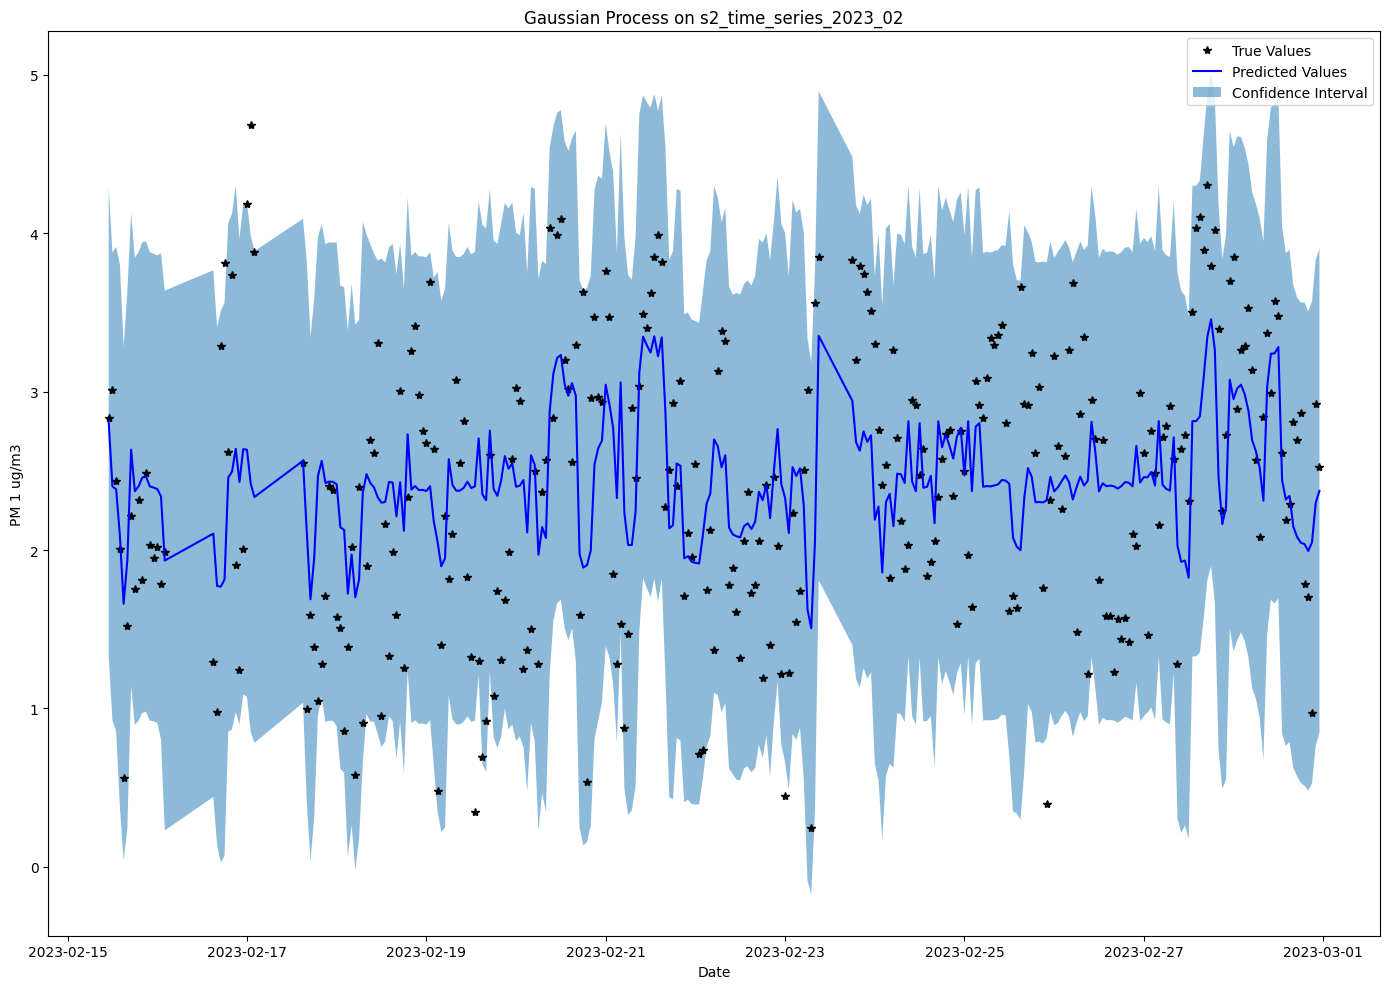

Iter 1/200 - Loss: 2.268
Iter 11/200 - Loss: 2.184
Iter 21/200 - Loss: 2.138
Iter 31/200 - Loss: 2.135
Iter 41/200 - Loss: 2.133
Iter 51/200 - Loss: 2.132
Iter 61/200 - Loss: 2.131
Iter 71/200 - Loss: 2.131
Iter 81/200 - Loss: 2.130
Iter 91/200 - Loss: 2.129
Iter 101/200 - Loss: 2.129
Iter 111/200 - Loss: 2.129
Iter 121/200 - Loss: 2.129
Iter 131/200 - Loss: 2.129
Iter 141/200 - Loss: 2.129
Iter 151/200 - Loss: 2.129
Iter 161/200 - Loss: 2.129
Iter 171/200 - Loss: 2.129
Iter 181/200 - Loss: 2.129
Iter 191/200 - Loss: 2.129


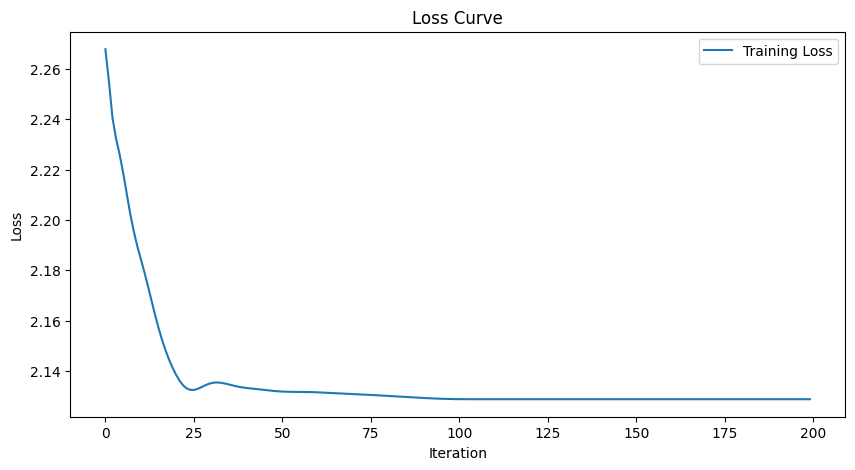

Mean Squared Error: 0.556
Negative Log Likelihood: 336.051
Mean Absolute Percentage Error: 36.257%


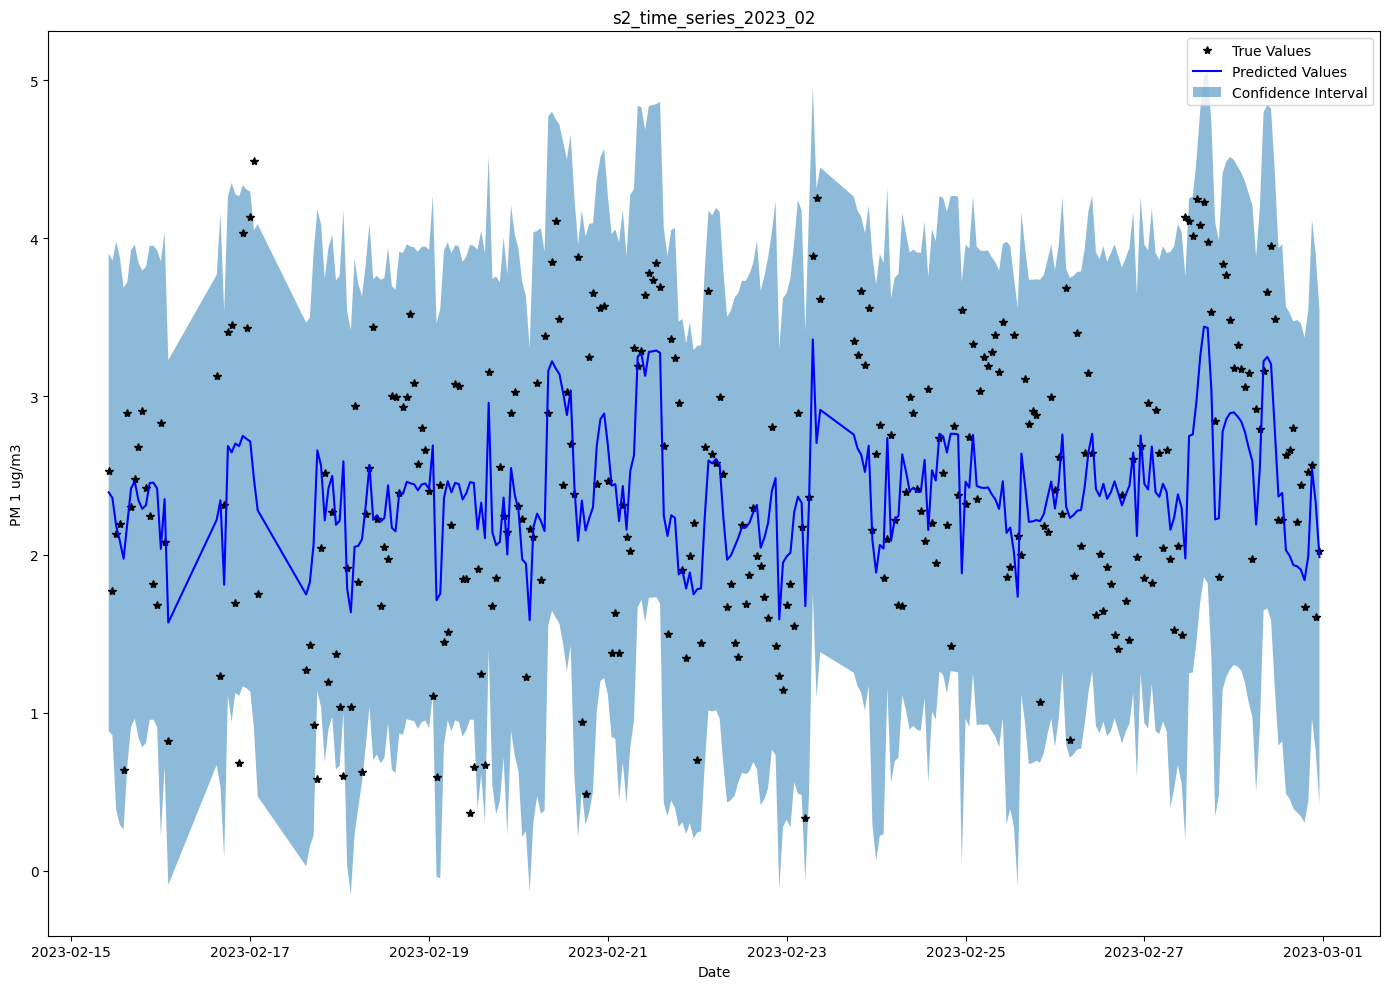

 
GP on s2 time series 2023 03 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 2.079
Iter 11/200 - Loss: 1.979
Iter 21/200 - Loss: 1.945
Iter 31/200 - Loss: 1.943
Iter 41/200 - Loss: 1.943
Iter 51/200 - Loss: 1.942
Iter 61/200 - Loss: 1.941
Iter 71/200 - Loss: 1.941
Iter 81/200 - Loss: 1.941
Iter 91/200 - Loss: 1.941
Iter 101/200 - Loss: 1.941
Iter 111/200 - Loss: 1.941
Iter 121/200 - Loss: 1.941
Iter 131/200 - Loss: 1.941
Iter 141/200 - Loss: 1.940
Iter 151/200 - Loss: 1.940
Iter 161/200 - Loss: 1.940
Iter 171/200 - Loss: 1.940
Iter 181/200 - Loss: 1.940
Iter 191/200 - Loss: 1.940


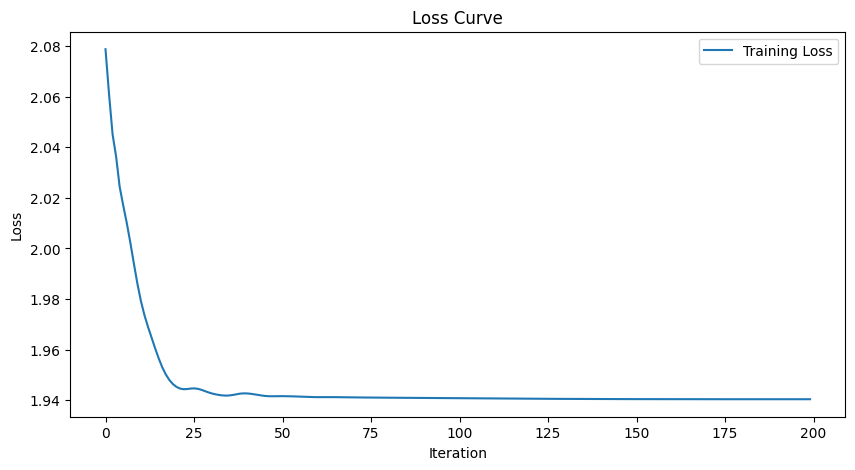

Mean Squared Error: 0.600
Negative Log Likelihood: 406.536
Mean Absolute Percentage Error: 44.684%


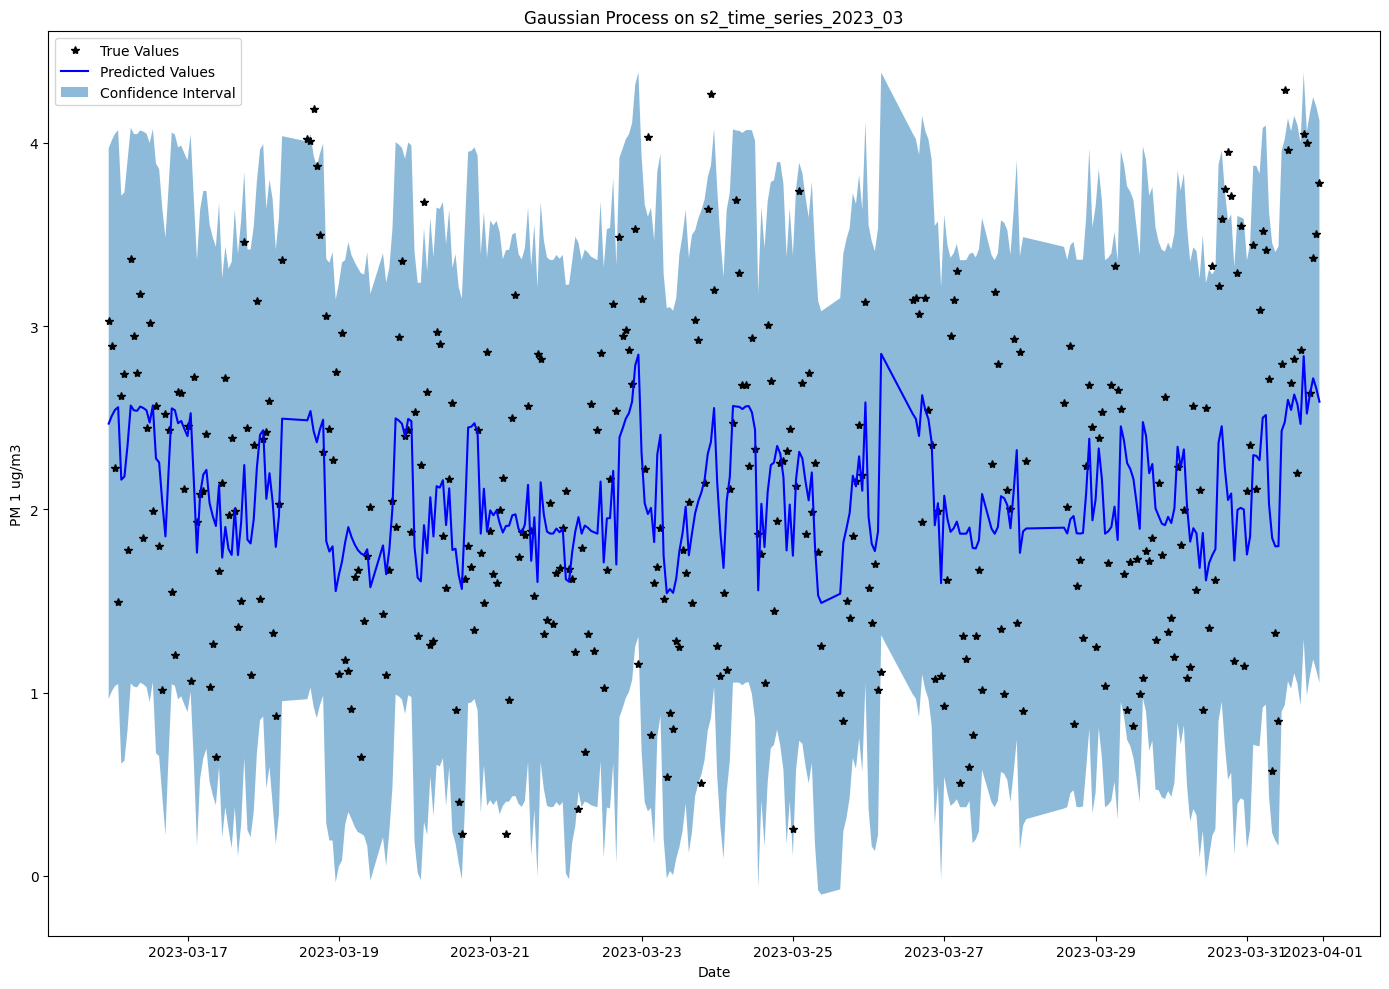

Iter 1/200 - Loss: 2.087
Iter 11/200 - Loss: 1.994
Iter 21/200 - Loss: 1.966
Iter 31/200 - Loss: 1.967
Iter 41/200 - Loss: 1.965
Iter 51/200 - Loss: 1.965
Iter 61/200 - Loss: 1.965
Iter 71/200 - Loss: 1.965
Iter 81/200 - Loss: 1.965
Iter 91/200 - Loss: 1.965
Iter 101/200 - Loss: 1.964
Iter 111/200 - Loss: 1.964
Iter 121/200 - Loss: 1.964
Iter 131/200 - Loss: 1.964
Iter 141/200 - Loss: 1.964
Iter 151/200 - Loss: 1.964
Iter 161/200 - Loss: 1.964
Iter 171/200 - Loss: 1.964
Iter 181/200 - Loss: 1.964
Iter 191/200 - Loss: 1.964


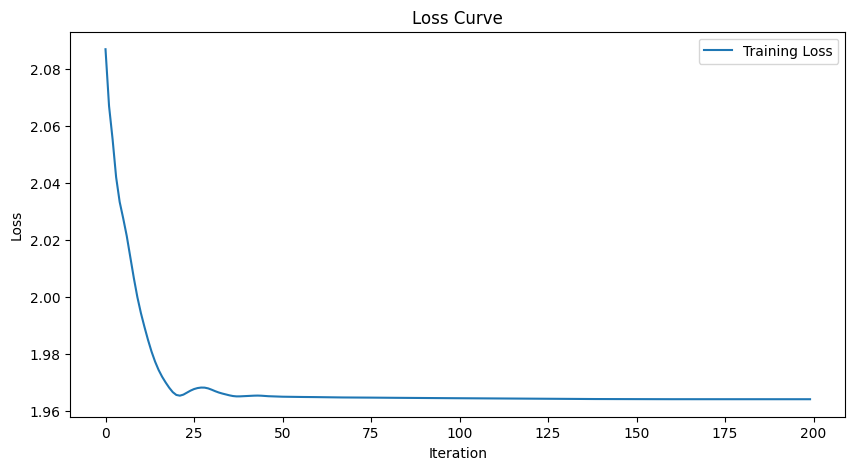

Mean Squared Error: 0.565
Negative Log Likelihood: 400.388
Mean Absolute Percentage Error: 42.231%


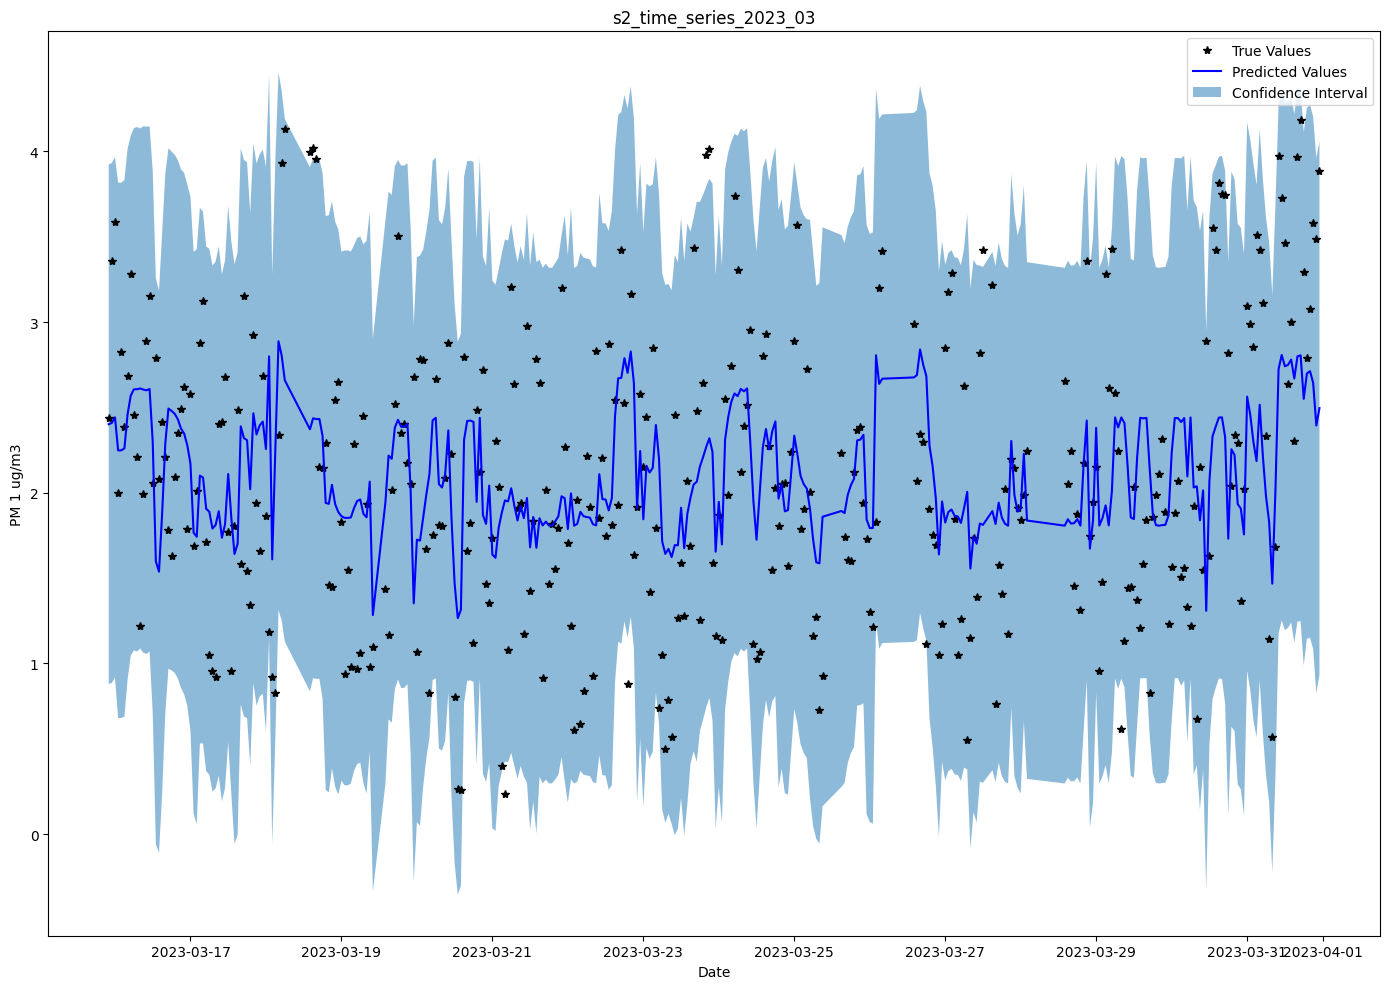

 
GP on s2 time series 2023 04 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 2.089
Iter 11/200 - Loss: 1.997
Iter 21/200 - Loss: 1.969
Iter 31/200 - Loss: 1.970
Iter 41/200 - Loss: 1.968
Iter 51/200 - Loss: 1.967
Iter 61/200 - Loss: 1.967
Iter 71/200 - Loss: 1.967
Iter 81/200 - Loss: 1.967
Iter 91/200 - Loss: 1.967
Iter 101/200 - Loss: 1.967
Iter 111/200 - Loss: 1.966
Iter 121/200 - Loss: 1.966
Iter 131/200 - Loss: 1.966
Iter 141/200 - Loss: 1.966
Iter 151/200 - Loss: 1.966
Iter 161/200 - Loss: 1.966
Iter 171/200 - Loss: 1.966
Iter 181/200 - Loss: 1.966
Iter 191/200 - Loss: 1.966


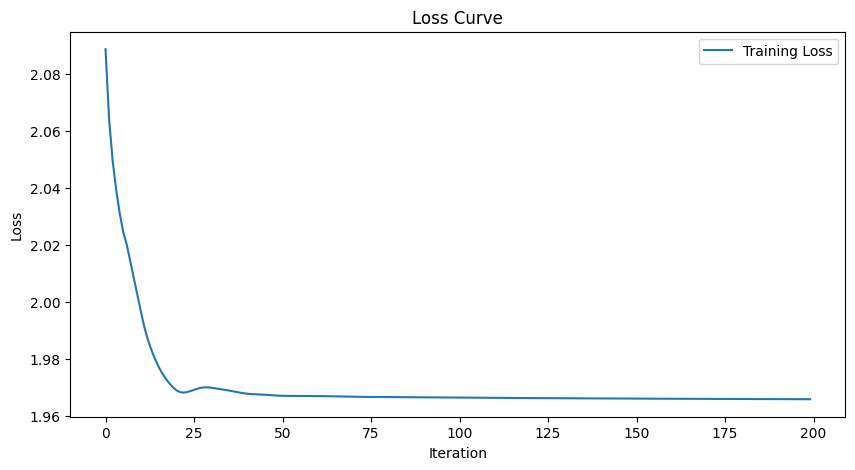

Mean Squared Error: 0.580
Negative Log Likelihood: 409.324
Mean Absolute Percentage Error: 37.813%


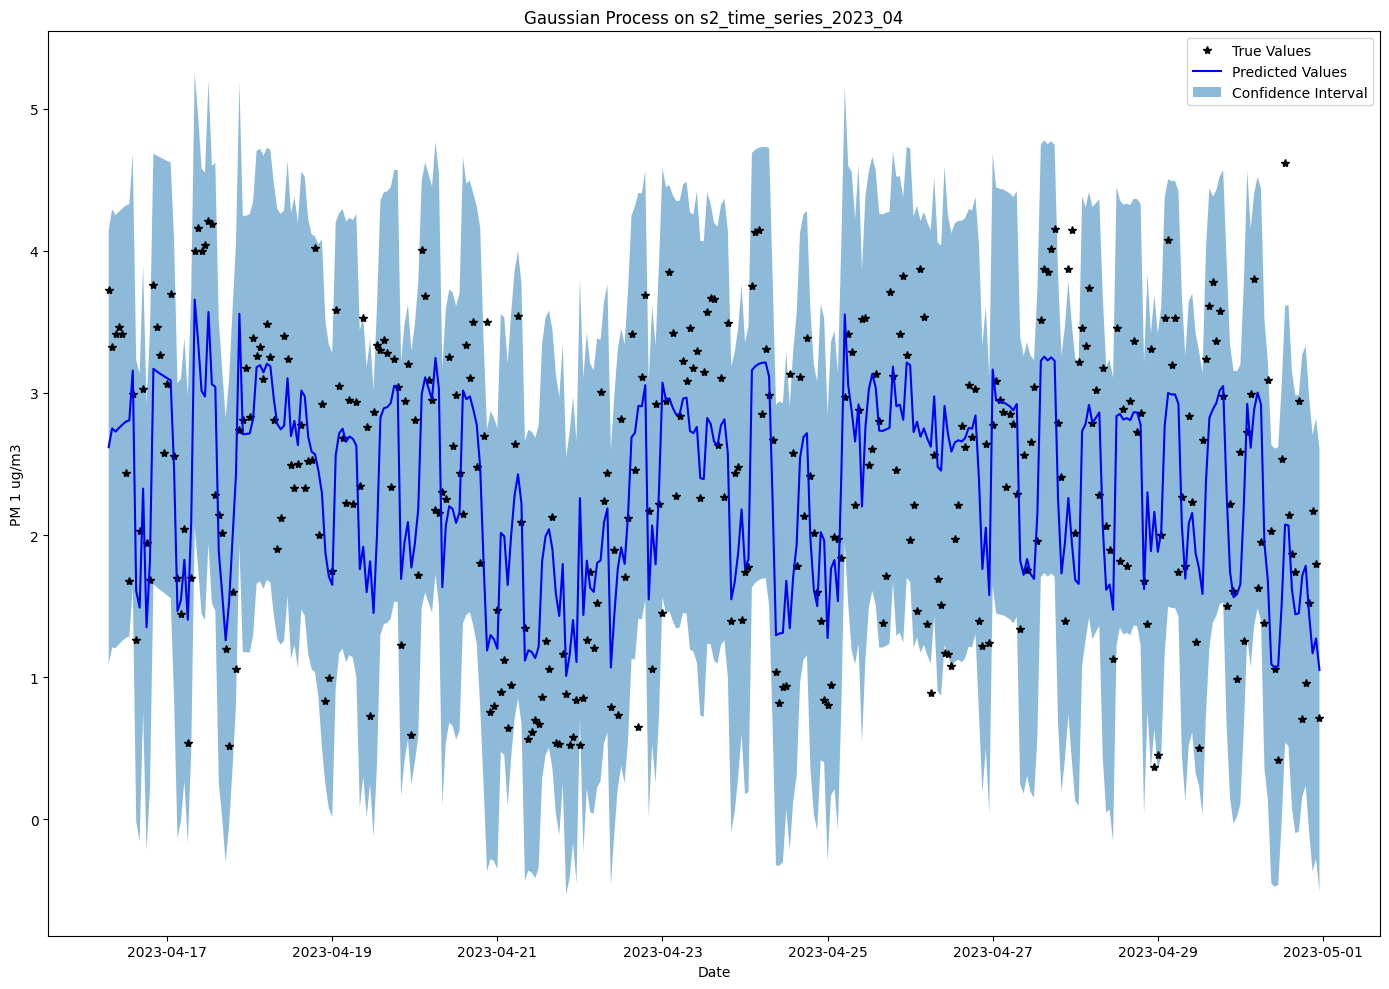

Iter 1/200 - Loss: 2.077
Iter 11/200 - Loss: 2.009
Iter 21/200 - Loss: 1.972
Iter 31/200 - Loss: 1.968
Iter 41/200 - Loss: 1.962
Iter 51/200 - Loss: 1.960
Iter 61/200 - Loss: 1.960
Iter 71/200 - Loss: 1.959
Iter 81/200 - Loss: 1.959
Iter 91/200 - Loss: 1.959
Iter 101/200 - Loss: 1.959
Iter 111/200 - Loss: 1.958
Iter 121/200 - Loss: 1.958
Iter 131/200 - Loss: 1.958
Iter 141/200 - Loss: 1.958
Iter 151/200 - Loss: 1.958
Iter 161/200 - Loss: 1.958
Iter 171/200 - Loss: 1.958
Iter 181/200 - Loss: 1.958
Iter 191/200 - Loss: 1.958


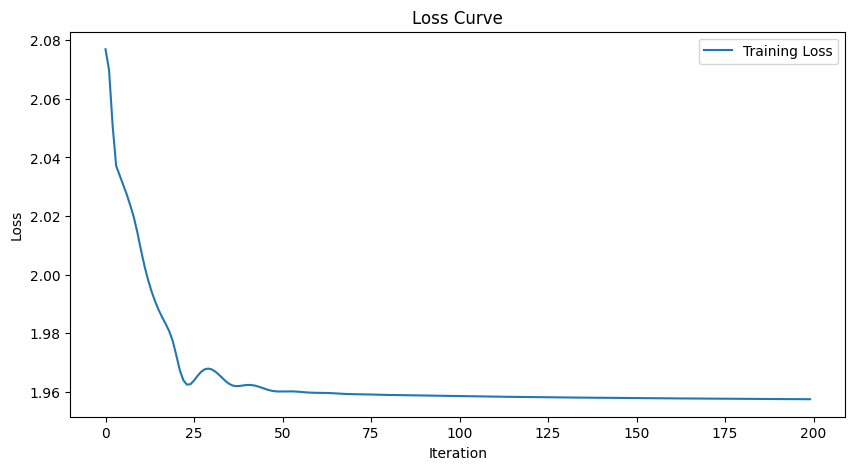

Mean Squared Error: 0.568
Negative Log Likelihood: 405.706
Mean Absolute Percentage Error: 43.627%


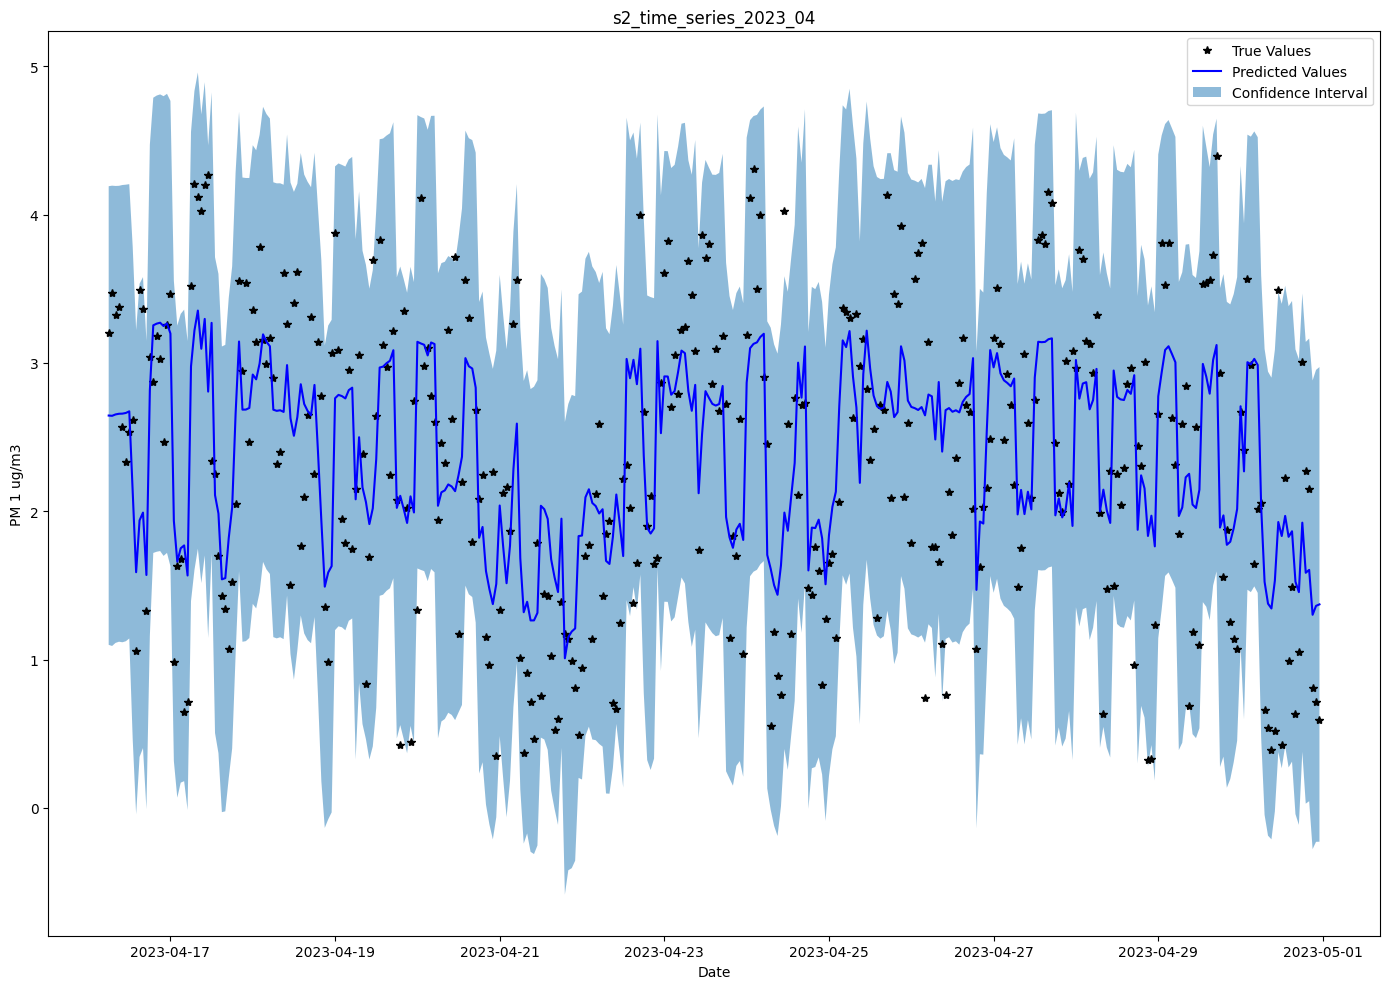

 
GP on s2 time series 2023 05 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 2.155
Iter 11/200 - Loss: 2.079
Iter 21/200 - Loss: 2.055
Iter 31/200 - Loss: 2.023
Iter 41/200 - Loss: 1.983
Iter 51/200 - Loss: 1.926
Iter 61/200 - Loss: 1.866
Iter 71/200 - Loss: 1.810
Iter 81/200 - Loss: 1.758
Iter 91/200 - Loss: 1.712
Iter 101/200 - Loss: 1.671
Iter 111/200 - Loss: 1.635
Iter 121/200 - Loss: 1.602
Iter 131/200 - Loss: 1.574
Iter 141/200 - Loss: 1.548
Iter 151/200 - Loss: 1.525
Iter 161/200 - Loss: 1.505
Iter 171/200 - Loss: 1.487
Iter 181/200 - Loss: 1.471
Iter 191/200 - Loss: 1.456


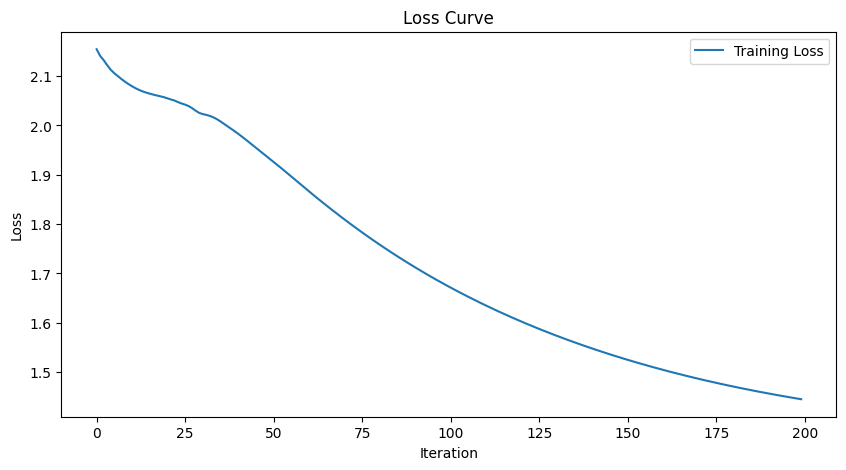

Mean Squared Error: 0.694
Negative Log Likelihood: 462.398
Mean Absolute Percentage Error: 54.217%


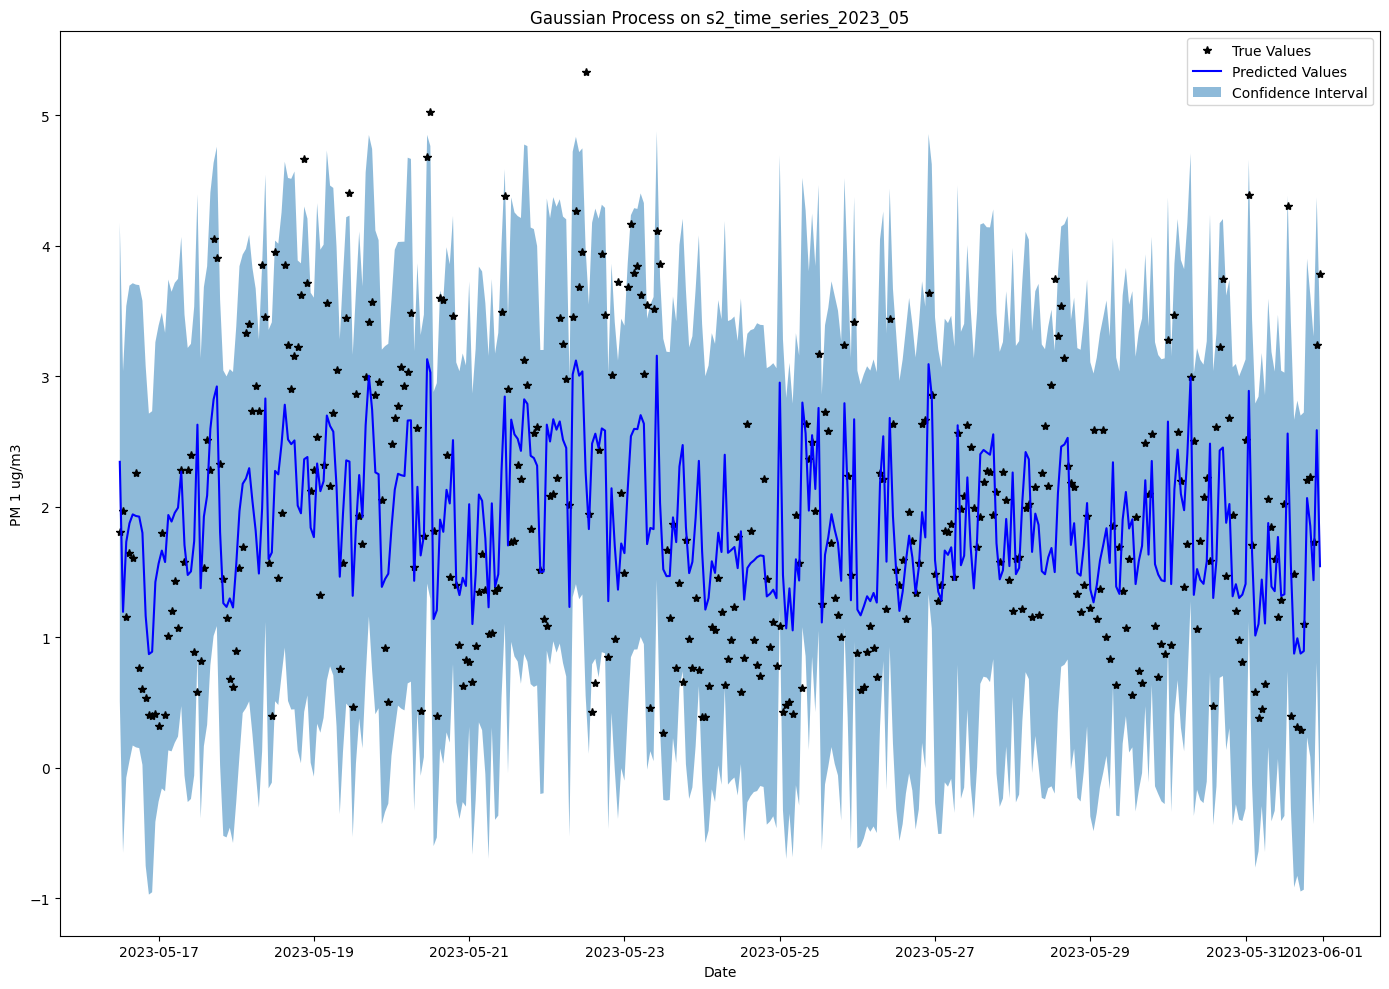

Iter 1/200 - Loss: 2.155
Iter 11/200 - Loss: 2.068
Iter 21/200 - Loss: 2.024
Iter 31/200 - Loss: 2.014
Iter 41/200 - Loss: 1.990
Iter 51/200 - Loss: 1.954
Iter 61/200 - Loss: 1.915
Iter 71/200 - Loss: 1.872
Iter 81/200 - Loss: 1.830
Iter 91/200 - Loss: 1.789
Iter 101/200 - Loss: 1.750
Iter 111/200 - Loss: 1.714
Iter 121/200 - Loss: 1.680
Iter 131/200 - Loss: 1.649
Iter 141/200 - Loss: 1.621
Iter 151/200 - Loss: 1.595
Iter 161/200 - Loss: 1.571
Iter 171/200 - Loss: 1.549
Iter 181/200 - Loss: 1.529
Iter 191/200 - Loss: 1.511


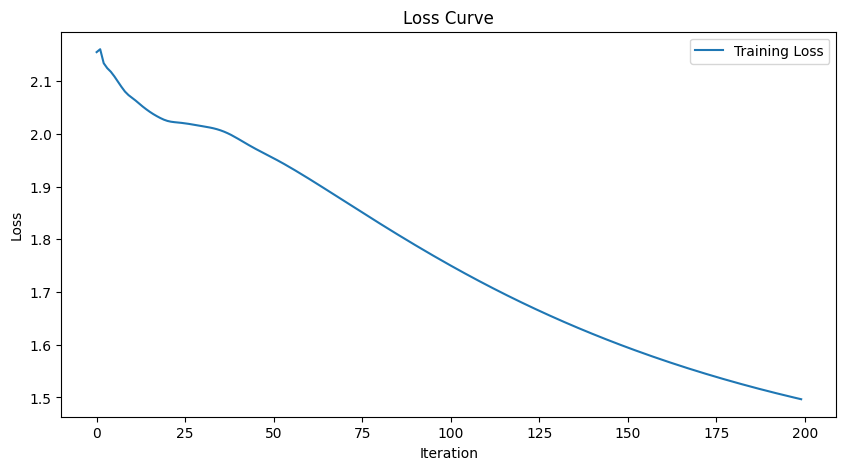

Mean Squared Error: 0.664
Negative Log Likelihood: 457.146
Mean Absolute Percentage Error: 55.452%


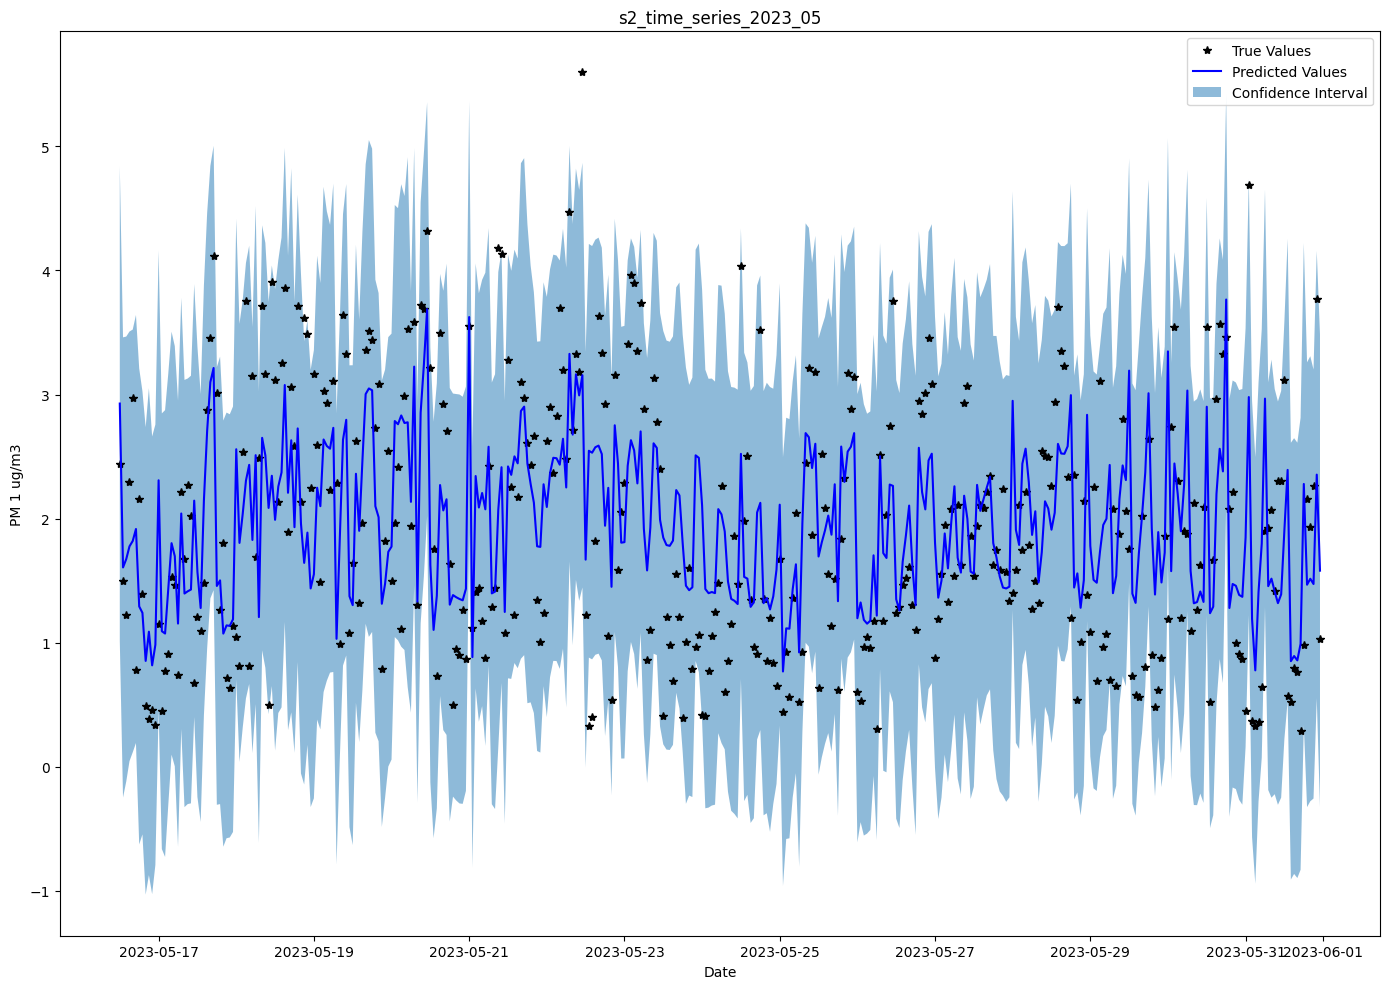

 
GP on s2 time series 2023 06 log_normalized data 50% test and train on both sets
Iter 1/200 - Loss: 2.716
Iter 11/200 - Loss: 2.556
Iter 21/200 - Loss: 2.456
Iter 31/200 - Loss: 2.377
Iter 41/200 - Loss: 2.277
Iter 51/200 - Loss: 2.173
Iter 61/200 - Loss: 2.075
Iter 71/200 - Loss: 1.986
Iter 81/200 - Loss: 1.906
Iter 91/200 - Loss: 1.834
Iter 101/200 - Loss: 1.771
Iter 111/200 - Loss: 1.714
Iter 121/200 - Loss: 1.663
Iter 131/200 - Loss: 1.617
Iter 141/200 - Loss: 1.577
Iter 151/200 - Loss: 1.541
Iter 161/200 - Loss: 1.509
Iter 171/200 - Loss: 1.481
Iter 181/200 - Loss: 1.456
Iter 191/200 - Loss: 1.434


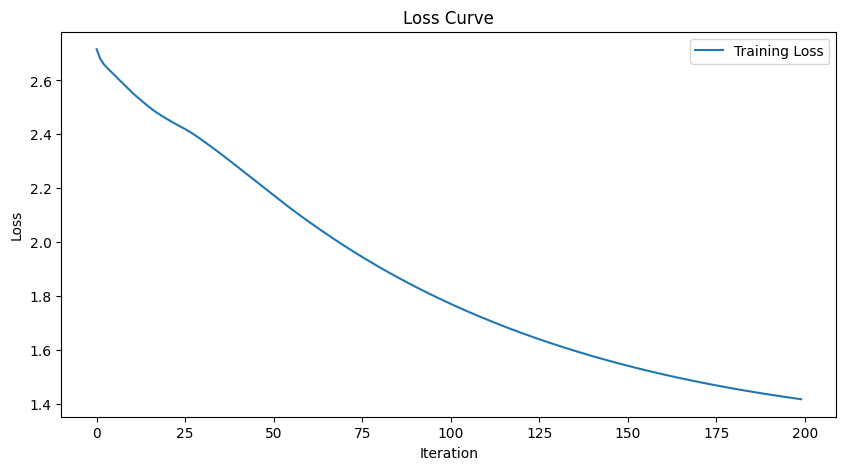

Mean Squared Error: 0.590
Negative Log Likelihood: 237.615
Mean Absolute Percentage Error: 50.593%


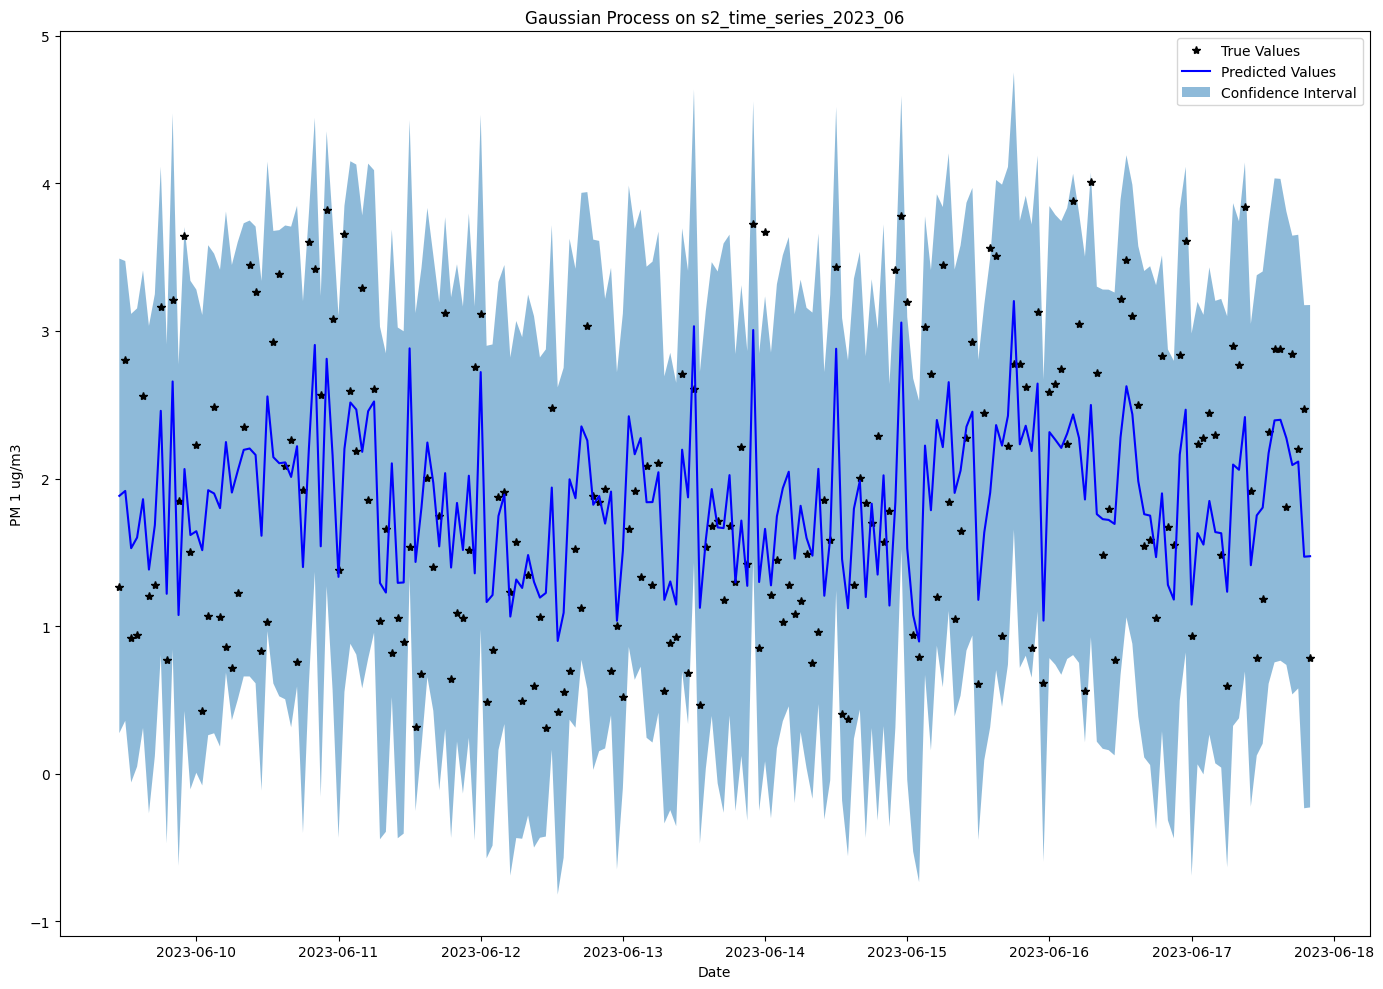

Iter 1/200 - Loss: 2.725
Iter 11/200 - Loss: 2.586
Iter 21/200 - Loss: 2.548
Iter 31/200 - Loss: 2.545
Iter 41/200 - Loss: 2.539
Iter 51/200 - Loss: 2.525
Iter 61/200 - Loss: 2.502
Iter 71/200 - Loss: 2.494
Iter 81/200 - Loss: 2.492
Iter 91/200 - Loss: 2.491
Iter 101/200 - Loss: 2.490
Iter 111/200 - Loss: 2.489
Iter 121/200 - Loss: 2.489
Iter 131/200 - Loss: 2.489
Iter 141/200 - Loss: 2.489
Iter 151/200 - Loss: 2.489
Iter 161/200 - Loss: 2.489
Iter 171/200 - Loss: 2.489
Iter 181/200 - Loss: 2.489
Iter 191/200 - Loss: 2.489


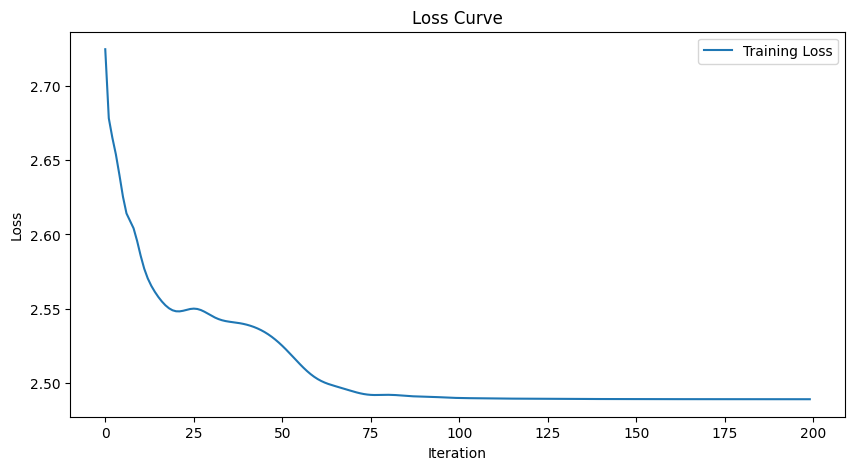

Mean Squared Error: 0.626
Negative Log Likelihood: 246.673
Mean Absolute Percentage Error: 54.217%


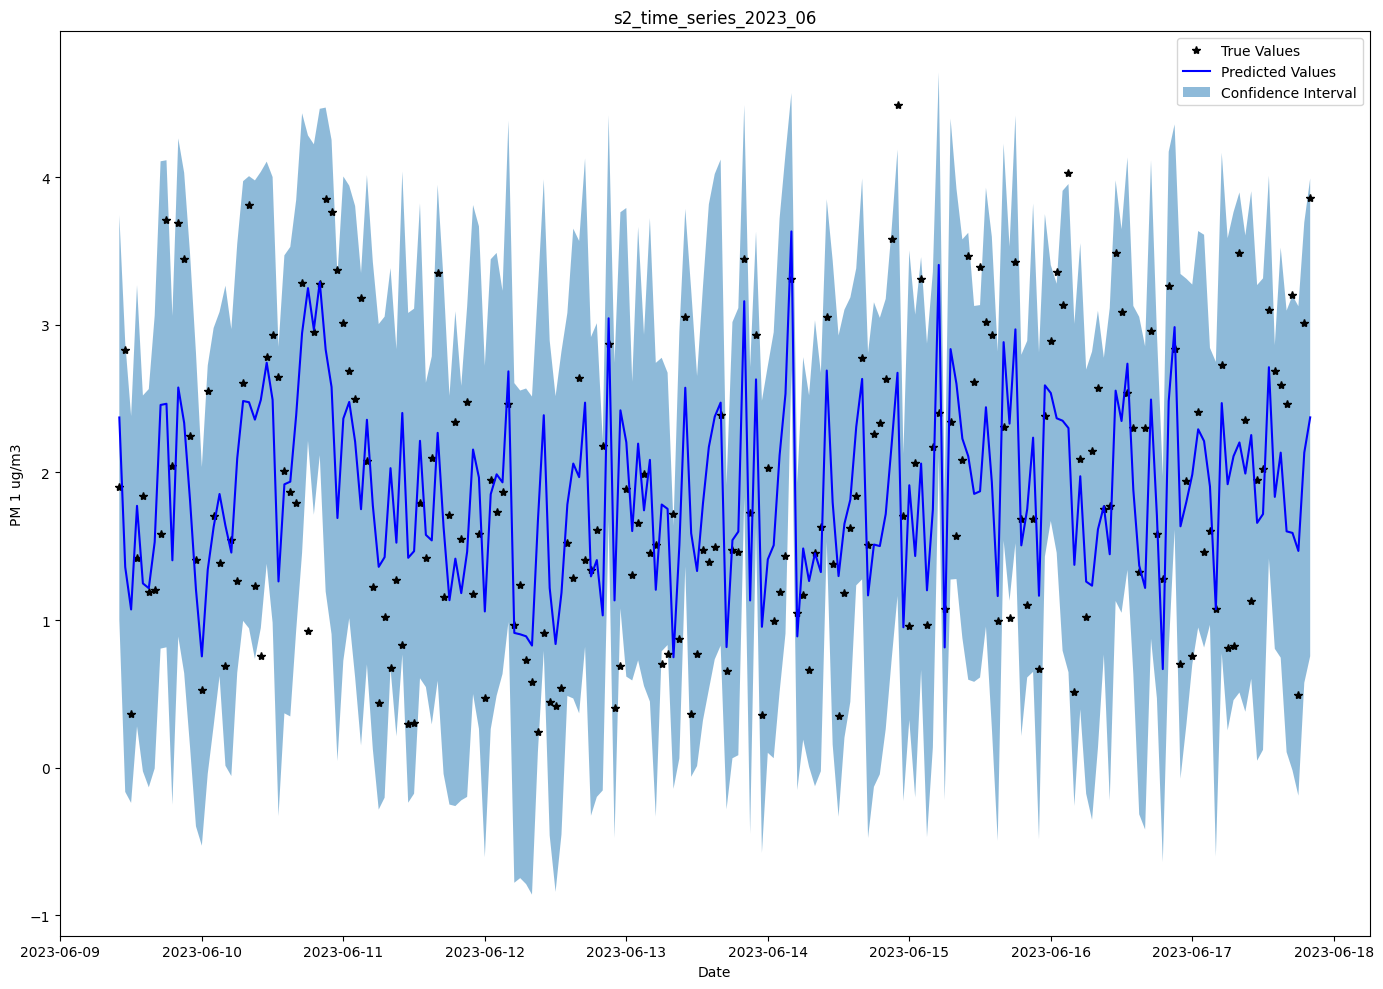

In [ ]:
def log_normalize(data):
    epsilon = 1e-6
    data = np.maximum(data, 0)  # Ensure all values are non-negative
    return np.log1p(data + epsilon)


# Define the month keys for s2 data
s2_keys = {
    's2_time_series_2022_06': s2_june22,
    's2_time_series_2022_07': s2_july22,
    's2_time_series_2022_08': s2_aug22,
    's2_time_series_2022_09': s2_sept22,
    's2_time_series_2022_10': s2_oct22,
    's2_time_series_2022_11': s2_nov22,
    's2_time_series_2022_12': s2_dec22,
    's2_time_series_2023_01': s2_jan23,
    's2_time_series_2023_02': s2_feb23,
    's2_time_series_2023_03': s2_mar23,
    's2_time_series_2023_04': s2_apr23,
    's2_time_series_2023_05': s2_may23,
    's2_time_series_2023_06': s2_june23,
}


# Loop through all months
for key, data in s2_keys.items():
    print(f'GP on {key.replace("_", " ")} log_normalized data 50% test and train on both sets')
    run_plt_gp(log_normalize(data), time_series_s2_dict[key], f'Gaussian Process on {key}', 0)
    run_plt_gp(log_normalize(data), time_series_s2_dict[key], f'{key}', 1)
    print(" ")


GP on m1 time series 2022 06 log_normalized data 50% test and train on both sets
Iter 1/100 - Loss: 8.901 
Iter 11/100 - Loss: 8.270 
Iter 21/100 - Loss: 7.845 
Iter 31/100 - Loss: 7.405 
Iter 41/100 - Loss: 7.002 
Iter 51/100 - Loss: 6.657 
Iter 61/100 - Loss: 6.350 
Iter 71/100 - Loss: 6.039 
Iter 81/100 - Loss: 5.729 
Iter 91/100 - Loss: 5.432 
Mean Squared Error: 0.064
Negative Log Likelihood: 0.886
Mean Absolute Percentage Error: 31.432%


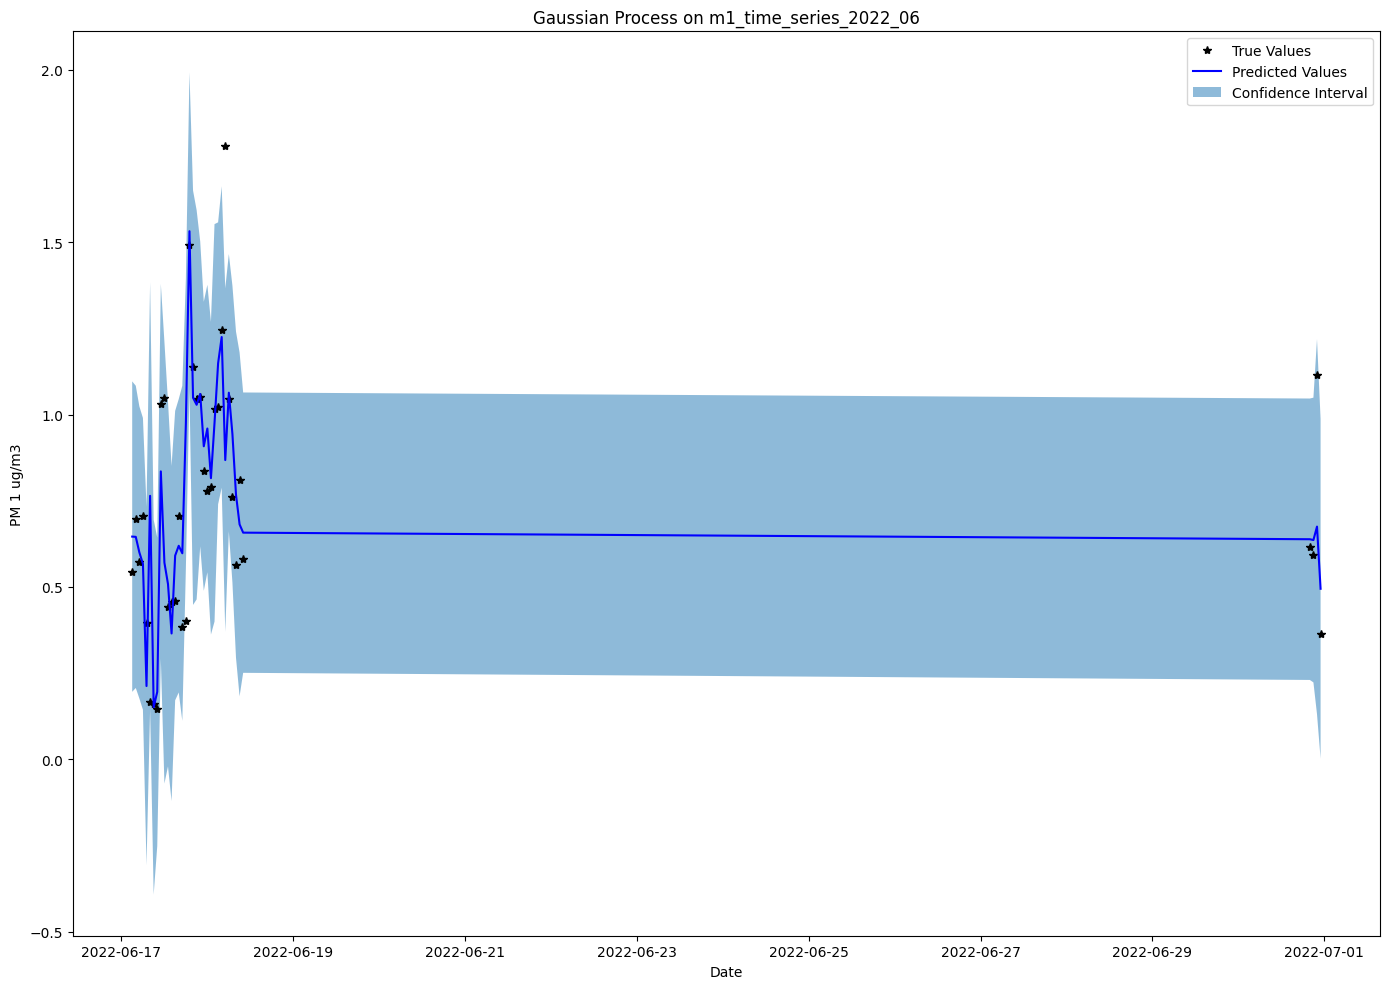

Iter 1/100 - Loss: 8.917 
Iter 11/100 - Loss: 8.289 
Iter 21/100 - Loss: 7.867 
Iter 31/100 - Loss: 7.423 
Iter 41/100 - Loss: 7.014 
Iter 51/100 - Loss: 6.676 
Iter 61/100 - Loss: 6.377 
Iter 71/100 - Loss: 6.078 
Iter 81/100 - Loss: 5.786 
Iter 91/100 - Loss: 5.507 
Mean Squared Error: 0.099
Negative Log Likelihood: 8.603
Mean Absolute Percentage Error: 44.243%


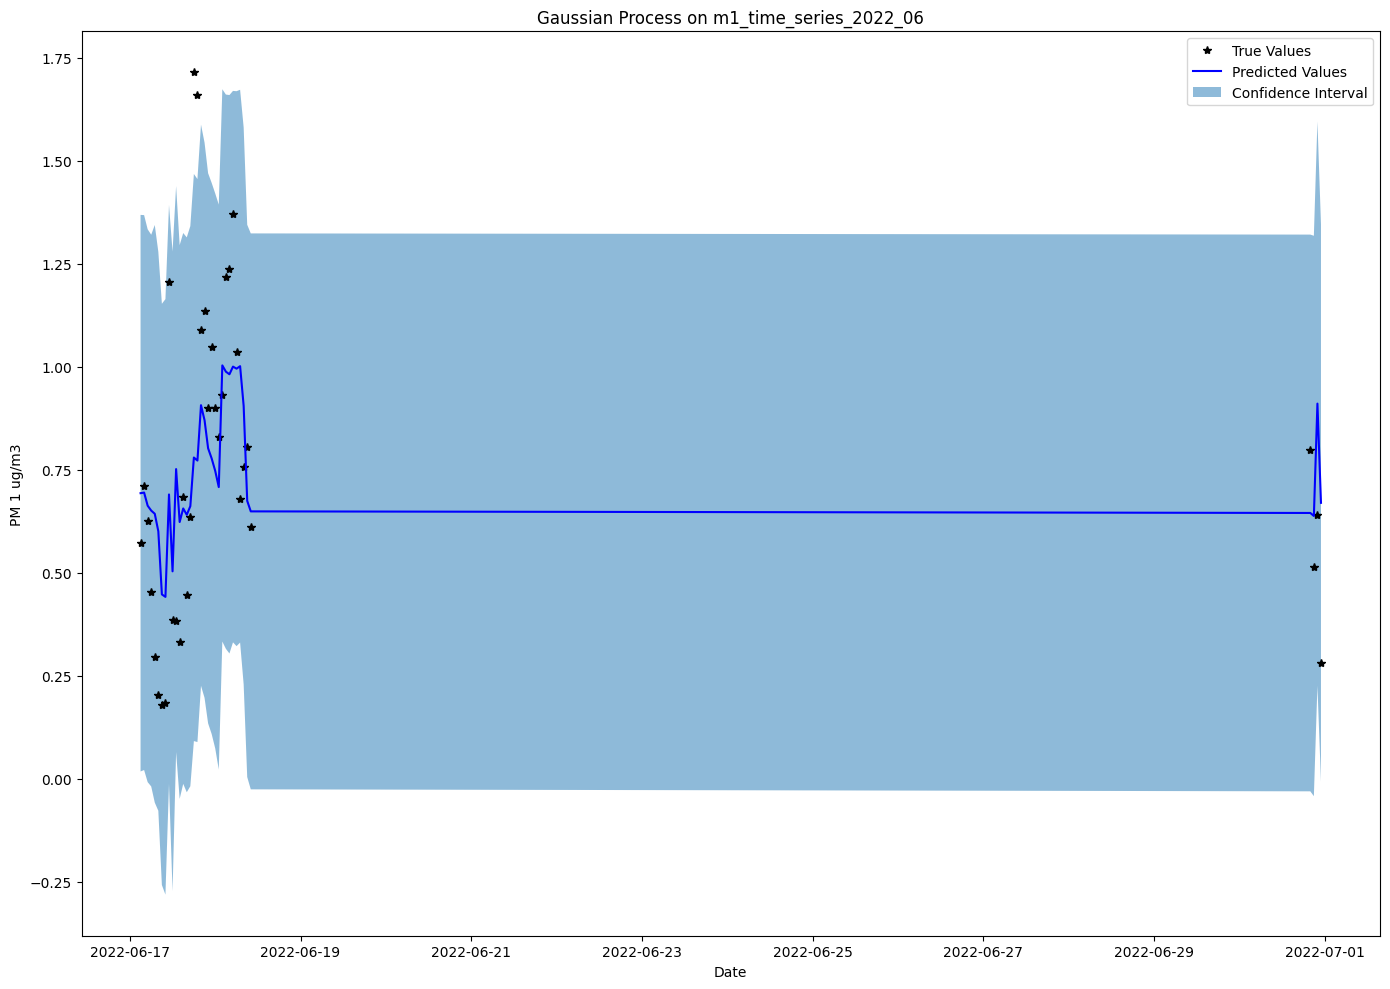

 
GP on m1 time series 2022 07 log_normalized data 50% test and train on both sets
Iter 1/100 - Loss: 1.821 
Iter 11/100 - Loss: 1.532 
Iter 21/100 - Loss: 1.260 
Iter 31/100 - Loss: 0.989 
Iter 41/100 - Loss: 0.742 
Iter 51/100 - Loss: 0.538 
Iter 61/100 - Loss: 0.396 
Iter 71/100 - Loss: 0.324 
Iter 81/100 - Loss: 0.296 
Iter 91/100 - Loss: 0.277 
Mean Squared Error: 0.030
Negative Log Likelihood: -119.457
Mean Absolute Percentage Error: 30.248%


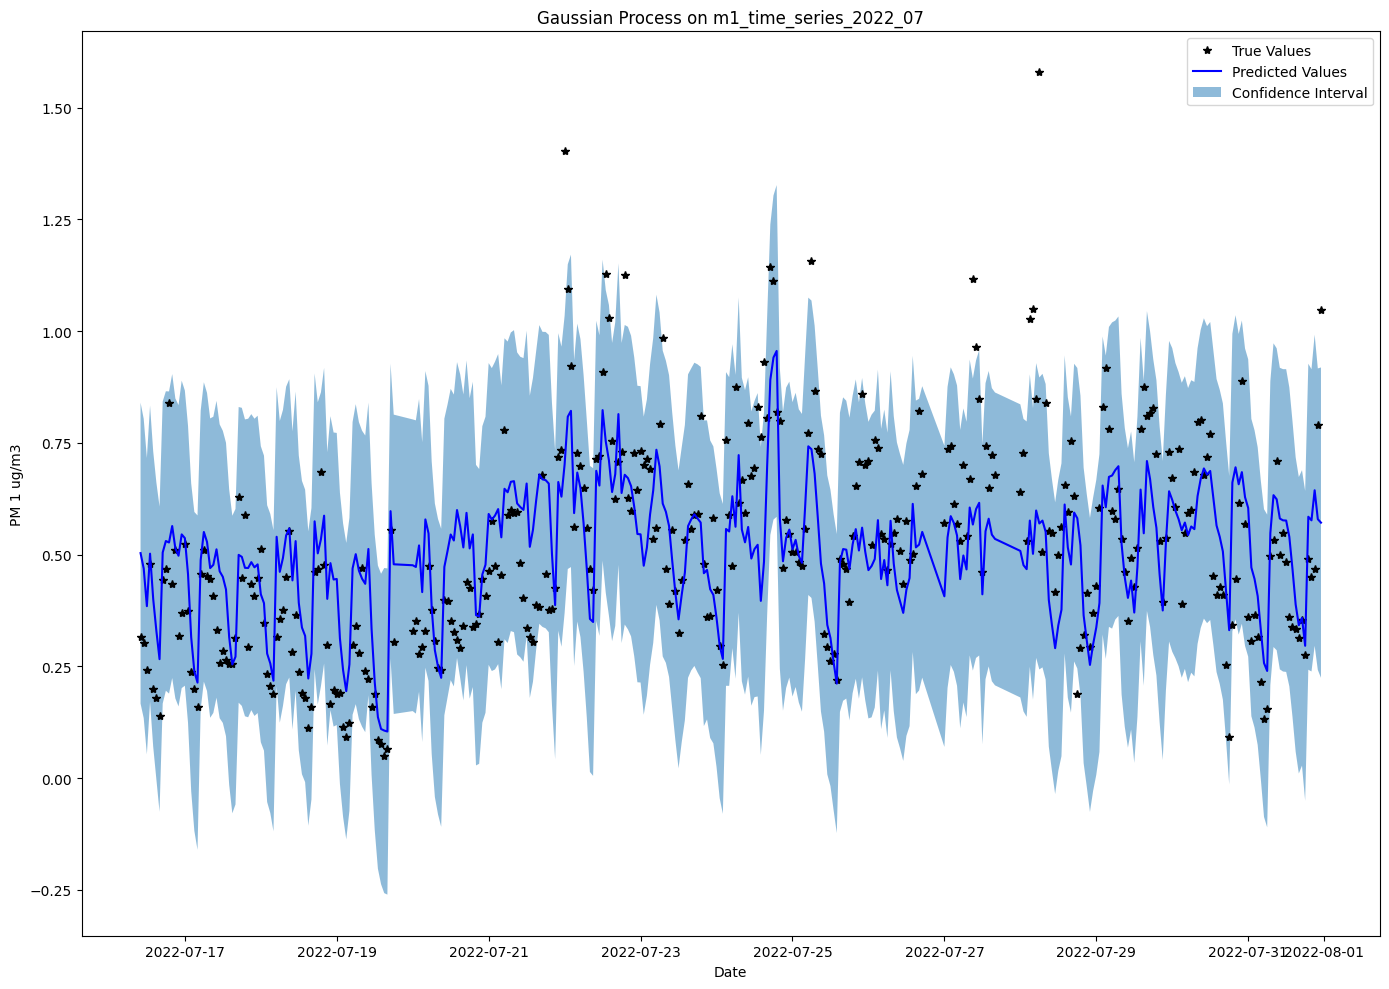

Iter 1/100 - Loss: 1.827 
Iter 11/100 - Loss: 1.537 
Iter 21/100 - Loss: 1.265 
Iter 31/100 - Loss: 0.996 
Iter 41/100 - Loss: 0.754 
Iter 51/100 - Loss: 0.560 
Iter 61/100 - Loss: 0.433 
Iter 71/100 - Loss: 0.373 
Iter 81/100 - Loss: 0.350 
Iter 91/100 - Loss: 0.333 
Mean Squared Error: 0.026
Negative Log Likelihood: -141.646
Mean Absolute Percentage Error: 30.999%


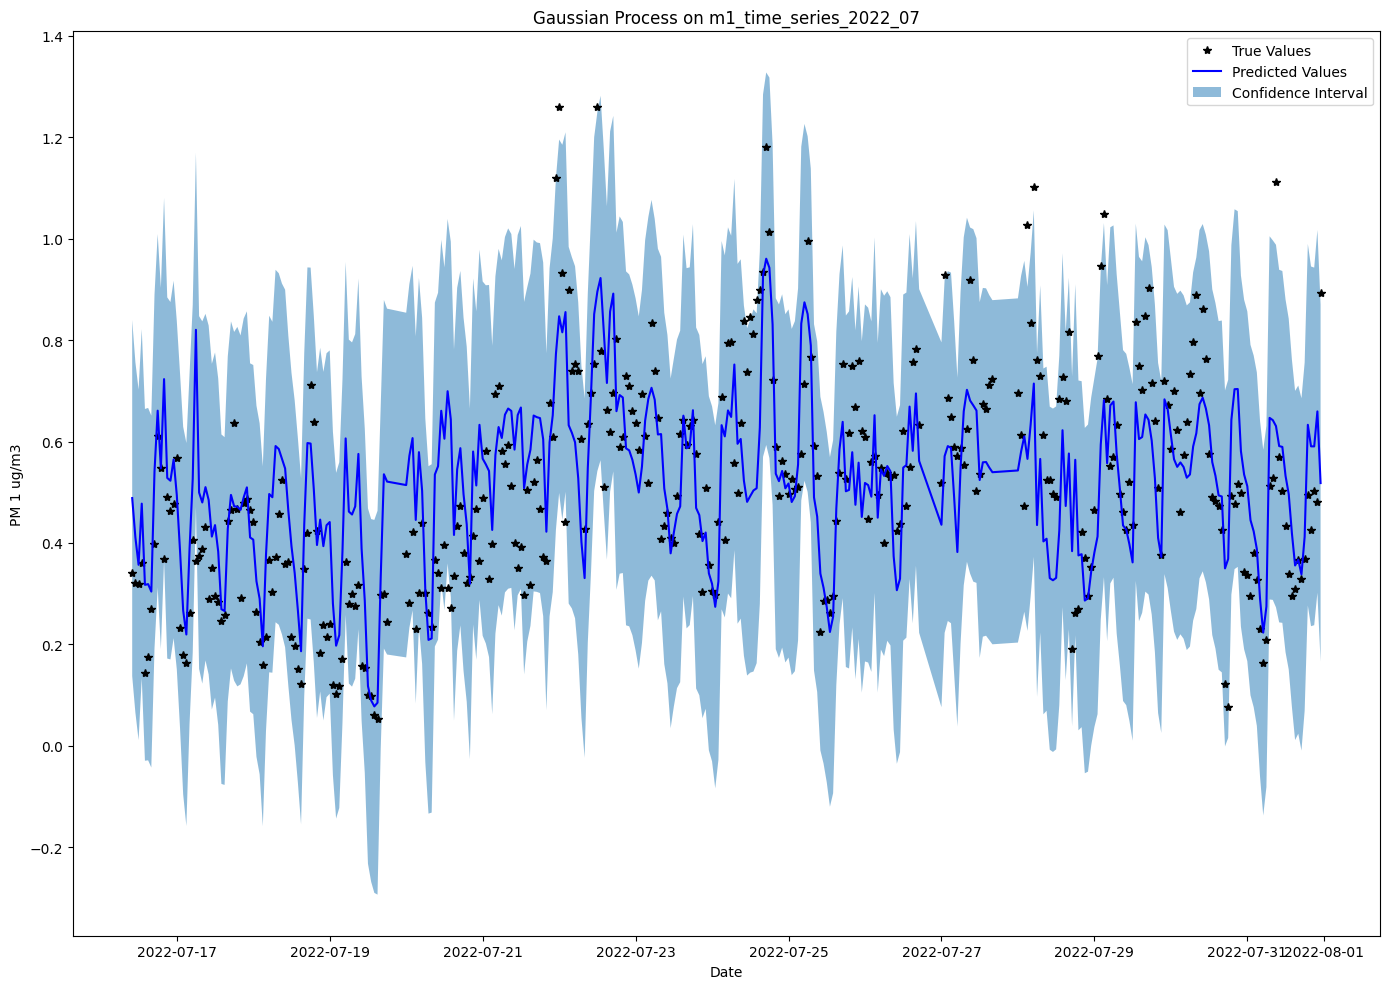

 
GP on m1 time series 2022 08 log_normalized data 50% test and train on both sets
Iter 1/100 - Loss: 1.789 
Iter 11/100 - Loss: 1.497 
Iter 21/100 - Loss: 1.226 


KeyboardInterrupt: 

In [ ]:
# Define the month keys for m1 data
m1_keys = {
    'm1_time_series_2022_06': m1_june22,
    'm1_time_series_2022_07': m1_july22,
    'm1_time_series_2022_08': m1_aug22,
    'm1_time_series_2022_09': m1_sept22,
    'm1_time_series_2022_10': m1_oct22,
    'm1_time_series_2022_11': m1_nov22,
    'm1_time_series_2022_12': m1_dec22,
    'm1_time_series_2023_01': m1_jan23,
    'm1_time_series_2023_02': m1_feb23,
    'm1_time_series_2023_03': m1_mar23,
    'm1_time_series_2023_04': m1_apr23,
    'm1_time_series_2023_05': m1_may23,
    'm1_time_series_2023_06': m1_june23,
}

# Loop through all months
for key, data in m1_keys.items():
    print(f'GP on {key.replace("_", " ")} log_normalized data 50% test and train on both sets')
    run_plt_gp(log_normalize(data), time_series_m1_dict[key], f'Gaussian Process on {key}', 0)
    run_plt_gp(log_normalize(data), time_series_m1_dict[key],f'Gaussian Process on {key}', 1)
    print(" ")
